3. Computationally solve the master equation with qutip without coupling between the atom and the cavity

<>:43: SyntaxWarning: invalid escape sequence '\h'
<>:63: SyntaxWarning: invalid escape sequence '\h'
<>:67: SyntaxWarning: invalid escape sequence '\m'
<>:71: SyntaxWarning: invalid escape sequence '\k'
<>:71: SyntaxWarning: invalid escape sequence '\G'
<>:43: SyntaxWarning: invalid escape sequence '\h'
<>:63: SyntaxWarning: invalid escape sequence '\h'
<>:67: SyntaxWarning: invalid escape sequence '\m'
<>:71: SyntaxWarning: invalid escape sequence '\k'
<>:71: SyntaxWarning: invalid escape sequence '\G'
/var/folders/6w/vv6mxd6s5tn2fg5xf8lytbl40000gp/T/ipykernel_39973/2592016580.py:43: SyntaxWarning: invalid escape sequence '\h'
  ax1.axhline(y=mnp, color='r', linestyle='-', label = "$\hat N$ final state")
/var/folders/6w/vv6mxd6s5tn2fg5xf8lytbl40000gp/T/ipykernel_39973/2592016580.py:63: SyntaxWarning: invalid escape sequence '\h'
  ax1.set_ylabel("$\hat N$",fontsize = 13)
/var/folders/6w/vv6mxd6s5tn2fg5xf8lytbl40000gp/T/ipykernel_39973/2592016580.py:67: SyntaxWarning: invalid escape s

<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.0001342296600341797
    preparation time: 0.002981901168823242
    run time: 30.90841293334961
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 2000.0] (1000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  3.9999999960472237
The value of the correlation function g_2 for the final state is: 0.9999999981309354
Occupation of 0-photon state: 0.018315638952775312,	 with a probability of 1.83%
Occupation of 1-photon state: 0.07326255564671087,	 with a probability of 7.33%
Occupation of 2-photon state: 0.14652511121117903,	 with a probability of 14.65%
Occupation of 3-photon state: 0.19536681489434046,	 with a probability of 19.54%
Occupation of 4-photon state: 0.1953668148444117,	 with a probability of 19.54%
Occupation of 5-photon state: 0.15629345189879812,	 with a probability of 15.63%
Occupation of 6-photon state: 0.104195634323854

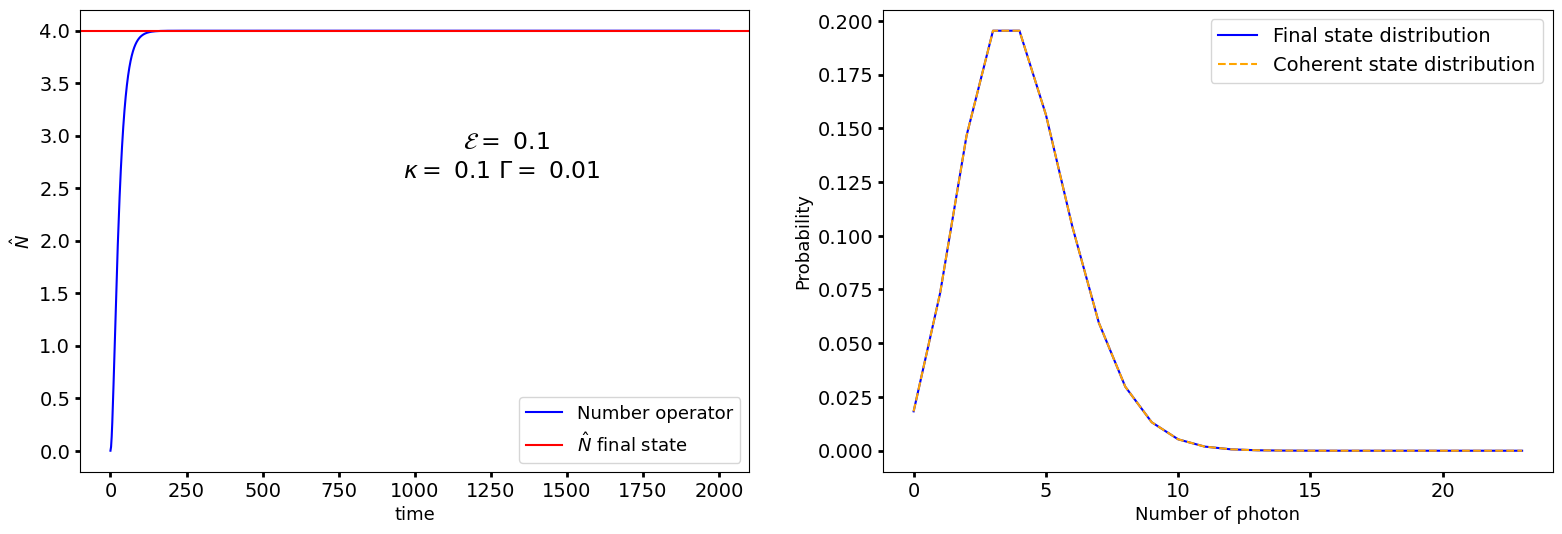

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import qutip
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 6))

L_dim = 24
t_Max = 2000.0
time = np.linspace(0.0,t_Max,1000)
psi0 = qutip.tensor(qutip.fock(2,0),qutip.fock(L_dim,0))
a = qutip.tensor(qutip.qeye(2), qutip.destroy(L_dim))
sigma = qutip.tensor(qutip.Qobj([[0,0],[1,0]]), qutip.qeye(L_dim))
ee = qutip.tensor(qutip.Qobj([[0,0],[0,1]]),qutip.qeye(L_dim))
gg = qutip.tensor(qutip.Qobj([[1,0],[0,0]]),qutip.qeye(L_dim))

factor = 1

omega = 0*factor
E = 0.1

H = omega*(a.dag()*a+ee) + E*a + E.conjugate()*a.dag()

eigenvalues, eigenstates = H.eigenstates()

k = 0.1*factor
G = 0.01*factor

c0 = np.sqrt(k)*a
c1 = np.sqrt(G)*sigma.dag()

opts = qutip.solver.Options(store_final_state = True)
result = qutip.mesolve(H,psi0,time,[c0,c1], e_ops=[a.dag()*a, ee], options=opts)
print(result)
f_state=result.final_state

ax1.plot(time,result.expect[0], color = "blue", label = "Number operator")
#ax1.plot(time,result.expect[1], color = "orange", label = "excited state")

#Fit orizontal line for the tail
mnp = qutip.expect(a.dag()*a,f_state)
ax1.axhline(y=mnp, color='r', linestyle='-', label = "$\hat N$ final state")
print("The mean number of photons is ", mnp)

g2 = qutip.expect(a.dag()*a.dag()*a*a,f_state)/(qutip.expect(a.dag()*a,f_state)**2)
print(f"The value of the correlation function g_2 for the final state is: {g2}")

occupation_numbers = np.diag(f_state.full())

for n in range(L_dim): 
    print(f"Occupation of {n}-photon state: {np.real_if_close(occupation_numbers[n])},\t with a probability of {round(100*abs(occupation_numbers[n]),2)}%")

#Coherent state
alpha = np.sqrt(mnp)
coh_state = qutip.coherent(L_dim, alpha)
coh_state = qutip.tensor(qutip.qeye(2),coh_state)
#print(coh_state)
overlap = (coh_state.dag() * f_state).full()[0,0]

ax1.tick_params(axis='both', which='both', labelsize=14, width=2)
ax1.set_xlabel("time",fontsize = 13)
ax1.set_ylabel("$\hat N$",fontsize = 13)

text_x = t_Max*0.48
text_y = max(result.expect[0])*0.72
s ='\t$\mathcal{E}=$ '+str(E)
ax1.text(text_x, text_y, s, ha='left', fontsize = 17)

text_y = max(result.expect[0])*0.65
s = "$\kappa = $ "+str(k)+ "\t$\Gamma =$ "+str(G)
ax1.text(text_x, text_y, s, ha='left', fontsize = 17)
ax1.legend(fontsize=13)

#coherent distribution
N = L_dim
P_coh = [(mnp**(n)/math.factorial(n)*np.e**(-mnp)) for n in range(0,N)]
P_n = f_state.ptrace(1).diag()
ax2.plot(range(L_dim),P_n, color = "blue", label="Final state distribution")
ax2.plot(range(L_dim),P_coh, linestyle = "--",color = "orange", label="Coherent state distribution")
ax2.tick_params(axis='both', which='both', labelsize=14, width=2)
ax2.set_ylabel("Probability", fontsize =13)
ax2.set_xlabel("Number of photon",fontsize =13)
ax2.legend(fontsize=14)
plt.savefig("System evolution, driver 1.png")
plt.show()


4. Code for the Hamiltonian with the couplers between the cavity and the atom.

<>:52: SyntaxWarning: invalid escape sequence '\h'
<>:71: SyntaxWarning: invalid escape sequence '\h'
<>:77: SyntaxWarning: invalid escape sequence '\o'
<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:77: SyntaxWarning: invalid escape sequence '\o'
<>:83: SyntaxWarning: invalid escape sequence '\k'
<>:83: SyntaxWarning: invalid escape sequence '\o'
<>:83: SyntaxWarning: invalid escape sequence '\G'
<>:83: SyntaxWarning: invalid escape sequence '\o'
<>:52: SyntaxWarning: invalid escape sequence '\h'
<>:71: SyntaxWarning: invalid escape sequence '\h'
<>:77: SyntaxWarning: invalid escape sequence '\o'
<>:77: SyntaxWarning: invalid escape sequence '\m'
<>:77: SyntaxWarning: invalid escape sequence '\o'
<>:83: SyntaxWarning: invalid escape sequence '\k'
<>:83: SyntaxWarning: invalid escape sequence '\o'
<>:83: SyntaxWarning: invalid escape sequence '\G'
<>:83: SyntaxWarning: invalid escape sequence '\o'
/var/folders/6w/vv6mxd6s5tn2fg5xf8lytbl40000gp/T/ipykernel_6976/2243731513.py:52: 

The calculated lower one-photon dressed state is 1.0780776406404415
Dressed state 0: energy = -0.6403888674652058
Dressed state 1: energy = -0.5388668973943759
Dressed state 2: energy = -0.5184656837417759
Dressed state 3: energy = -0.43423281563286537
Dressed state 4: energy = -0.32476924524216755
Dressed state 5: energy = -0.20615518710614833
Dressed state 6: energy = -0.19038896702592453
Dressed state 7: energy = -0.1357539750052118
Dressed state 8: energy = -0.08423277888944719
Dressed state 9: energy = -0.03754108166971824
Dressed state 10: energy = -7.86023164800623e-05
Dressed state 11: energy = 7.90384334252216e-05
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 8.893013000488281e-05
    preparation time: 0.0001270771026611328
    run time: 0.7339668273925781
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0

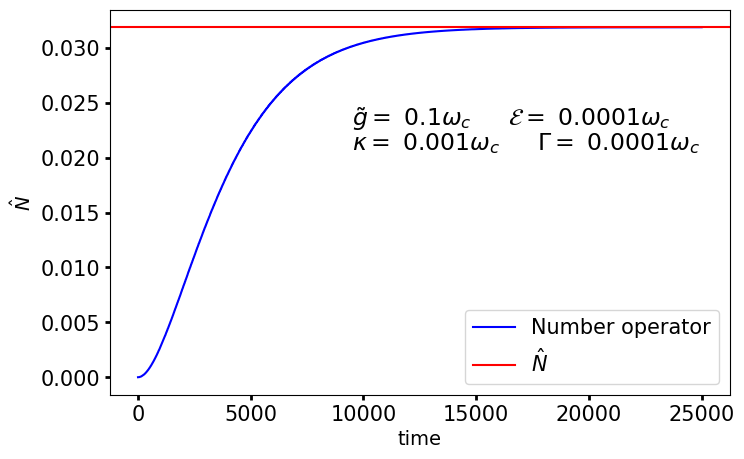

Dressed state 0: energy = -0.6403888674652058
Dressed state 1: energy = -0.5388668973943759
Dressed state 2: energy = -0.5184656837417759
Dressed state 3: energy = -0.43423281563286537
Dressed state 4: energy = -0.32476924524216755
Dressed state 5: energy = -0.20615518710614833
Dressed state 6: energy = -0.19038896702592453
Dressed state 7: energy = -0.1357539750052118
Dressed state 8: energy = -0.08423277888944719
Dressed state 9: energy = -0.03754108166971824
Dressed state 10: energy = -7.86023164800623e-05
Dressed state 11: energy = 7.90384334252216e-05
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.316734313964844e-05
    preparation time: 0.00015425682067871094
    run time: 0.8526492118835449
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.00039468685112329494
The value of the correlation function g_2 for

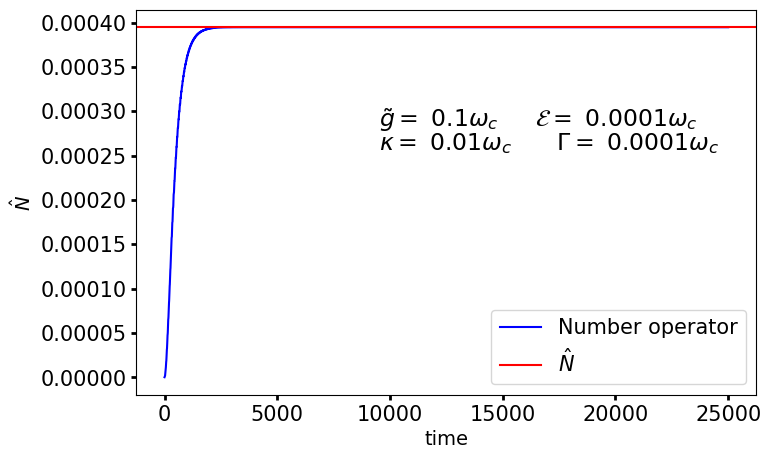

Dressed state 0: energy = -0.6403888674652058
Dressed state 1: energy = -0.5388668973943759
Dressed state 2: energy = -0.5184656837417759
Dressed state 3: energy = -0.43423281563286537
Dressed state 4: energy = -0.32476924524216755
Dressed state 5: energy = -0.20615518710614833
Dressed state 6: energy = -0.19038896702592453
Dressed state 7: energy = -0.1357539750052118
Dressed state 8: energy = -0.08423277888944719
Dressed state 9: energy = -0.03754108166971824
Dressed state 10: energy = -7.86023164800623e-05
Dressed state 11: energy = 7.90384334252216e-05
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.1975250244140625e-05
    preparation time: 0.00013303756713867188
    run time: 0.5803520679473877
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  3.995117316487651e-06
The value of the correlation function g_2 for

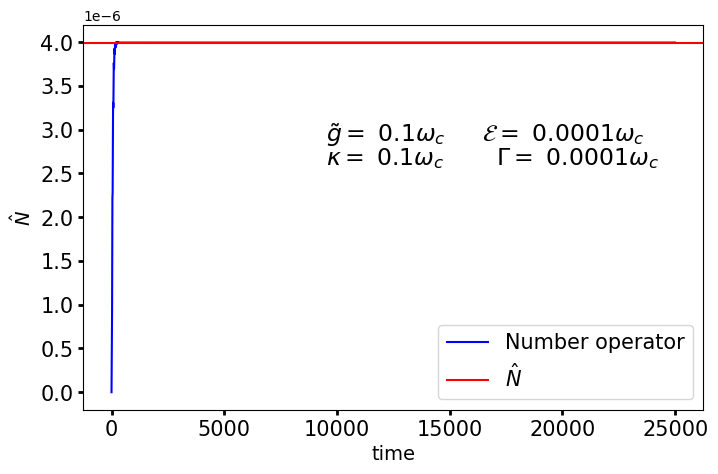

The calculated lower one-photon dressed state is 1.4756246098625196
Dressed state 0: energy = -3.5214366284355796
Dressed state 1: energy = -2.927810872331634
Dressed state 2: energy = -2.9037476328937584
Dressed state 3: energy = -2.3182599842474043
Dressed state 4: energy = -1.6837977874041465
Dressed state 5: energy = -1.2848096975895695
Dressed state 6: energy = -1.001249203969406
Dressed state 7: energy = -0.9271859646108117
Dressed state 8: energy = -0.5854876330619321
Dressed state 9: energy = -0.2687006105485277
Dressed state 10: energy = -7.242470778210775e-05
Dressed state 11: energy = 7.248474984789692e-05
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 7.82012939453125e-05
    preparation time: 0.00014019012451171875
    run time: 3.4322597980499268
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.02980

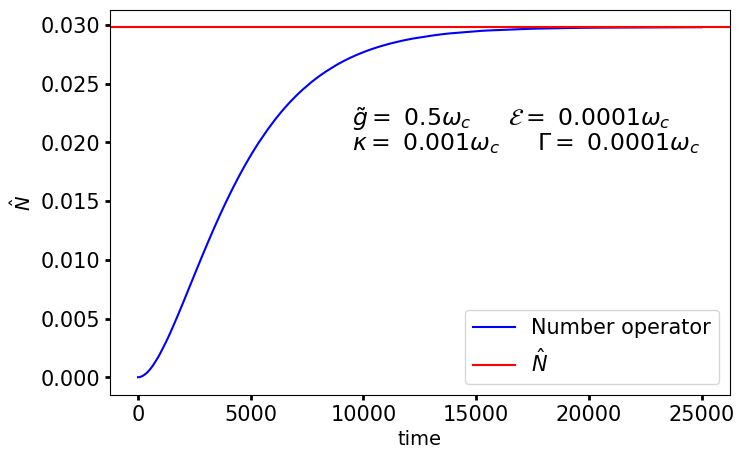

Dressed state 0: energy = -3.5214366284355796
Dressed state 1: energy = -2.927810872331634
Dressed state 2: energy = -2.9037476328937584
Dressed state 3: energy = -2.3182599842474043
Dressed state 4: energy = -1.6837977874041465
Dressed state 5: energy = -1.2848096975895695
Dressed state 6: energy = -1.001249203969406
Dressed state 7: energy = -0.9271859646108117
Dressed state 8: energy = -0.5854876330619321
Dressed state 9: energy = -0.2687006105485277
Dressed state 10: energy = -7.242470778210775e-05
Dressed state 11: energy = 7.248474984789692e-05
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 2.4080276489257812e-05
    preparation time: 6.604194641113281e-05
    run time: 3.4375882148742676
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.0003922714448025313
The value of the correlation function g_2 for the fi

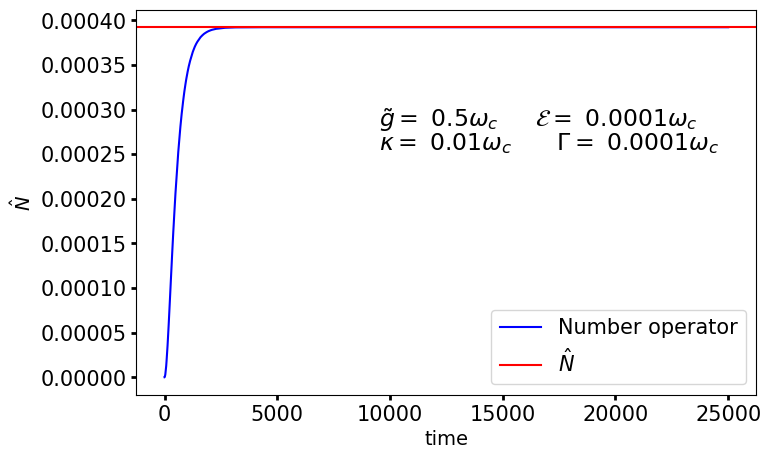

Dressed state 0: energy = -3.5214366284355796
Dressed state 1: energy = -2.927810872331634
Dressed state 2: energy = -2.9037476328937584
Dressed state 3: energy = -2.3182599842474043
Dressed state 4: energy = -1.6837977874041465
Dressed state 5: energy = -1.2848096975895695
Dressed state 6: energy = -1.001249203969406
Dressed state 7: energy = -0.9271859646108117
Dressed state 8: energy = -0.5854876330619321
Dressed state 9: energy = -0.2687006105485277
Dressed state 10: energy = -7.242470778210775e-05
Dressed state 11: energy = 7.248474984789692e-05
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 7.009506225585938e-05
    preparation time: 8.869171142578125e-05
    run time: 4.653012037277222
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  3.992714525648312e-06
The value of the correlation function g_2 for the fina

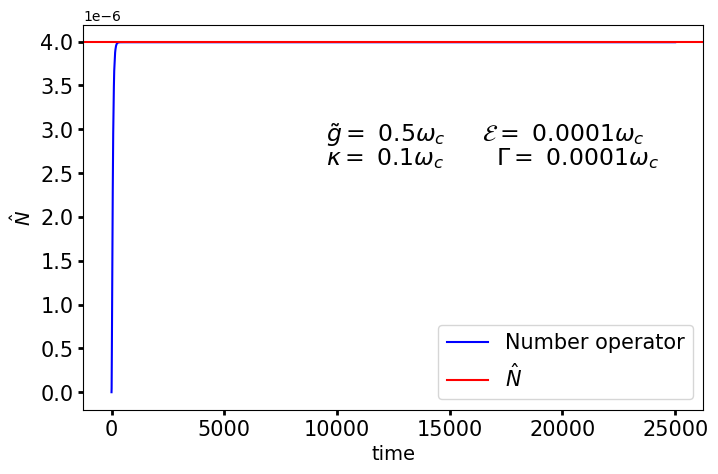

The calculated lower one-photon dressed state is 1.7753905296791062
Dressed state 0: energy = -5.690981786800532
Dressed state 1: energy = -4.726757408046802
Dressed state 2: energy = -4.702343161953676
Dressed state 3: energy = -3.7370377331902214
Dressed state 4: energy = -2.707428078547944
Dressed state 5: energy = -2.112923649150105
Dressed state 6: energy = -1.6007810496888075
Dressed state 7: energy = -1.5263668036272984
Dressed state 8: energy = -0.9653054191602609
Dressed state 9: energy = -0.44413401458293883
Dressed state 10: energy = -7.178835096592308e-05
Dressed state 11: energy = 7.182465173856742e-05
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.000102996826171875
    preparation time: 0.00019478797912597656
    run time: 7.196150064468384
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.02957527

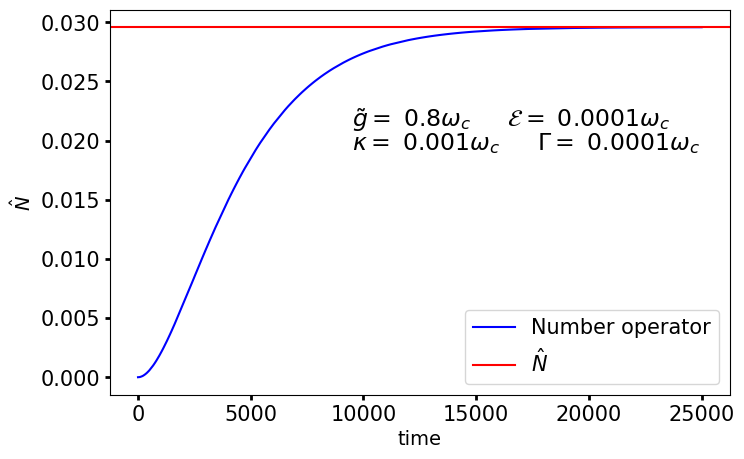

Dressed state 0: energy = -5.690981786800532
Dressed state 1: energy = -4.726757408046802
Dressed state 2: energy = -4.702343161953676
Dressed state 3: energy = -3.7370377331902214
Dressed state 4: energy = -2.707428078547944
Dressed state 5: energy = -2.112923649150105
Dressed state 6: energy = -1.6007810496888075
Dressed state 7: energy = -1.5263668036272984
Dressed state 8: energy = -0.9653054191602609
Dressed state 9: energy = -0.44413401458293883
Dressed state 10: energy = -7.178835096592308e-05
Dressed state 11: energy = 7.182465173856742e-05
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 9.083747863769531e-05
    preparation time: 0.0001678466796875
    run time: 6.206239938735962
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.0003919924602940736
The value of the correlation function g_2 for the final sta

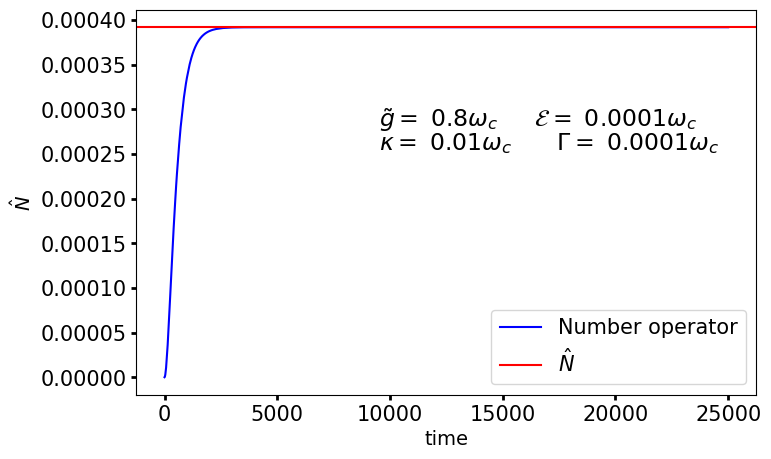

Dressed state 0: energy = -5.690981786800532
Dressed state 1: energy = -4.726757408046802
Dressed state 2: energy = -4.702343161953676
Dressed state 3: energy = -3.7370377331902214
Dressed state 4: energy = -2.707428078547944
Dressed state 5: energy = -2.112923649150105
Dressed state 6: energy = -1.6007810496888075
Dressed state 7: energy = -1.5263668036272984
Dressed state 8: energy = -0.9653054191602609
Dressed state 9: energy = -0.44413401458293883
Dressed state 10: energy = -7.178835096592308e-05
Dressed state 11: energy = 7.182465173856742e-05
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.0003390312194824219
    preparation time: 0.0002579689025878906
    run time: 3.967020034790039
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  3.992435094032348e-06
The value of the correlation function g_2 for the final 

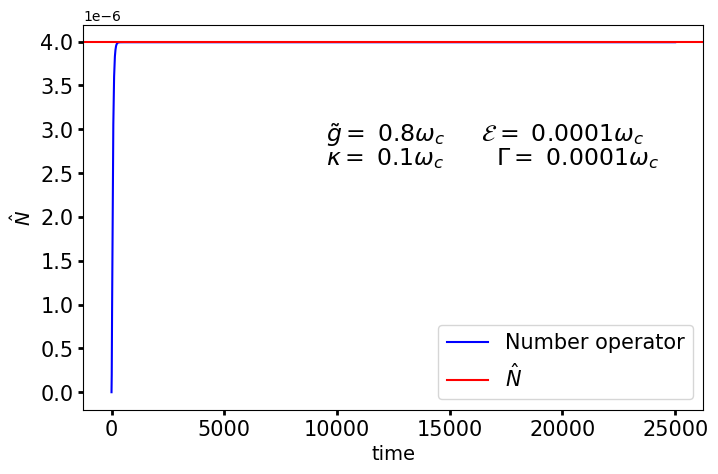

The calculated lower one-photon dressed state is 1.9753124511871278
Dressed state 0: energy = -7.137770040783065
Dressed state 1: energy = -5.9264060396958085
Dressed state 2: energy = -5.901874694306329
Dressed state 3: energy = -4.683168564942059
Dressed state 4: energy = -3.3900594099347314
Dressed state 5: energy = -2.6653545816378226
Dressed state 6: energy = -2.0006248946860077
Dressed state 7: energy = -1.926093549316895
Dressed state 8: energy = -1.218706121718258
Dressed state 9: energy = -0.5611903744389418
Dressed state 10: energy = -7.157447041502932e-05
Dressed state 11: energy = 7.160319374135172e-05
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.698204040527344e-05
    preparation time: 0.00015211105346679688
    run time: 9.144851922988892
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.02949772

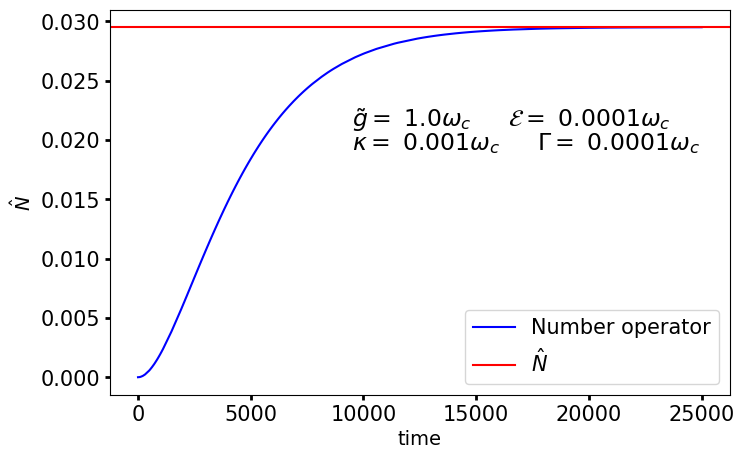

Dressed state 0: energy = -7.137770040783065
Dressed state 1: energy = -5.9264060396958085
Dressed state 2: energy = -5.901874694306329
Dressed state 3: energy = -4.683168564942059
Dressed state 4: energy = -3.3900594099347314
Dressed state 5: energy = -2.6653545816378226
Dressed state 6: energy = -2.0006248946860077
Dressed state 7: energy = -1.926093549316895
Dressed state 8: energy = -1.218706121718258
Dressed state 9: energy = -0.5611903744389418
Dressed state 10: energy = -7.157447041502932e-05
Dressed state 11: energy = 7.160319374135172e-05
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 9.083747863769531e-05
    preparation time: 0.00018596649169921875
    run time: 10.31762409210205
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.0003918971825008343
The value of the correlation function g_2 for the final 

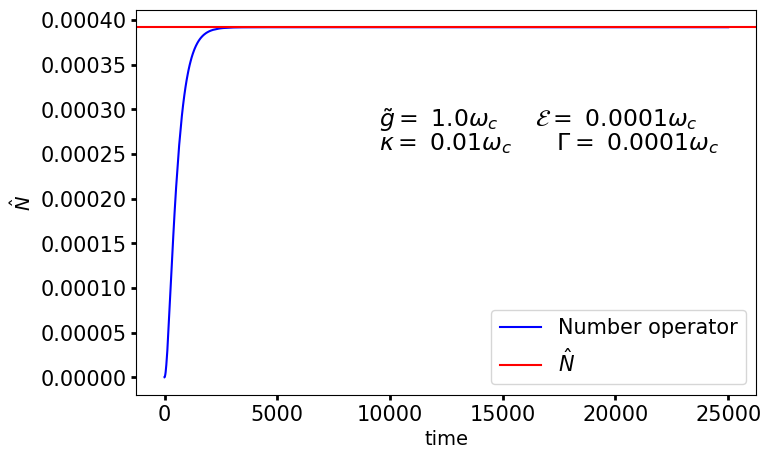

Dressed state 0: energy = -7.137770040783065
Dressed state 1: energy = -5.9264060396958085
Dressed state 2: energy = -5.901874694306329
Dressed state 3: energy = -4.683168564942059
Dressed state 4: energy = -3.3900594099347314
Dressed state 5: energy = -2.6653545816378226
Dressed state 6: energy = -2.0006248946860077
Dressed state 7: energy = -1.926093549316895
Dressed state 8: energy = -1.218706121718258
Dressed state 9: energy = -0.5611903744389418
Dressed state 10: energy = -7.157447041502932e-05
Dressed state 11: energy = 7.160319374135172e-05
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 6.175041198730469e-05
    preparation time: 0.00011110305786132812
    run time: 5.6225457191467285
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  3.992339864051688e-06
The value of the correlation function g_2 for the final

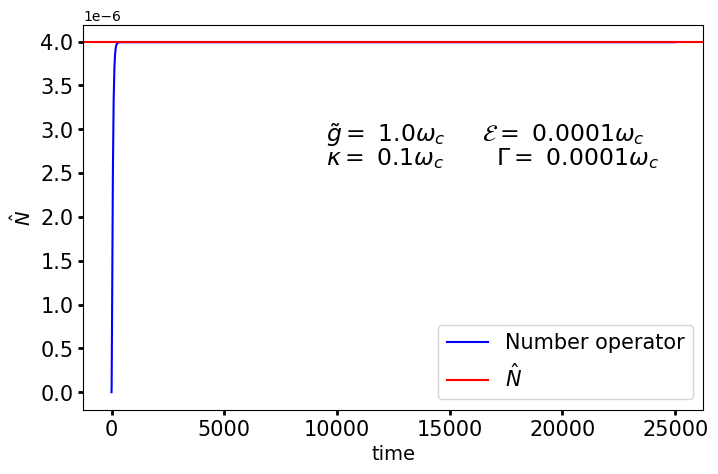

The calculated lower one-photon dressed state is 1.0780776406404415
Dressed state 0: energy = -0.6404545967618417
Dressed state 1: energy = -0.5388561895757402
Dressed state 2: energy = -0.5184497959758847
Dressed state 3: energy = -0.434222293077607
Dressed state 4: energy = -0.32475912723307815
Dressed state 5: energy = -0.2061458638249343
Dressed state 6: energy = -0.19046451894079666
Dressed state 7: energy = -0.13573980015038298
Dressed state 8: energy = -0.08421861867686353
Dressed state 9: energy = -0.03752787576413923
Dressed state 10: energy = -0.0007662281085152303
Dressed state 11: energy = 0.0008098450338877221
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 6.604194641113281e-05
    preparation time: 0.0001499652862548828
    run time: 1.1443111896514893
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0

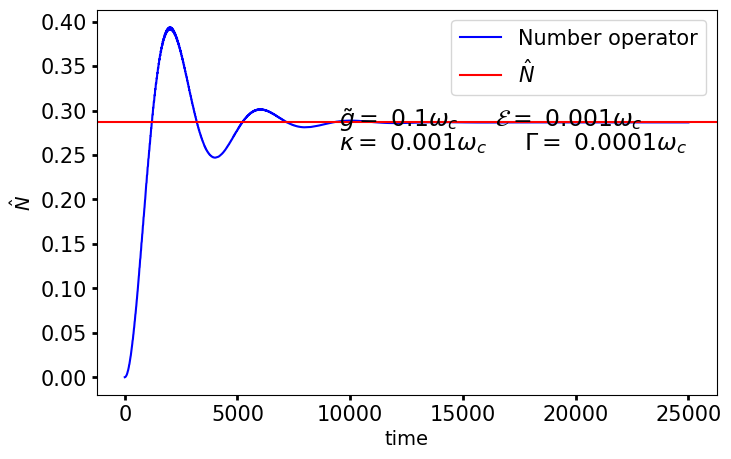

Dressed state 0: energy = -0.6404545967618417
Dressed state 1: energy = -0.5388561895757402
Dressed state 2: energy = -0.5184497959758847
Dressed state 3: energy = -0.434222293077607
Dressed state 4: energy = -0.32475912723307815
Dressed state 5: energy = -0.2061458638249343
Dressed state 6: energy = -0.19046451894079666
Dressed state 7: energy = -0.13573980015038298
Dressed state 8: energy = -0.08421861867686353
Dressed state 9: energy = -0.03752787576413923
Dressed state 10: energy = -0.0007662281085152303
Dressed state 11: energy = 0.0008098450338877221
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.1021575927734375e-05
    preparation time: 0.00013899803161621094
    run time: 0.9115381240844727
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.03523989011881117
The value of the correlation function g_2 for t

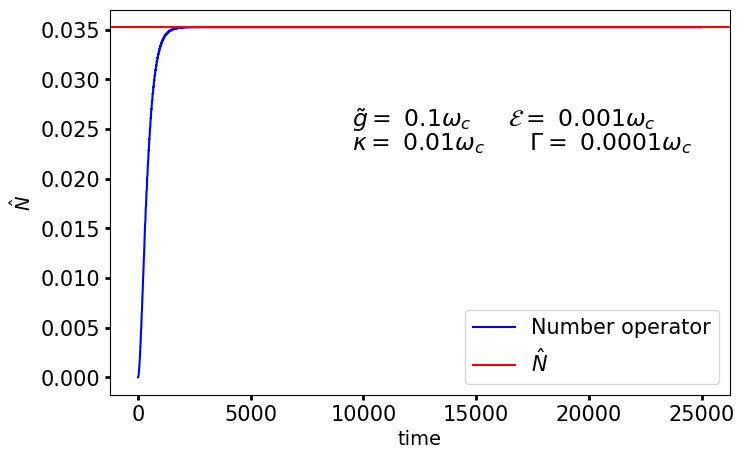

Dressed state 0: energy = -0.6404545967618417
Dressed state 1: energy = -0.5388561895757402
Dressed state 2: energy = -0.5184497959758847
Dressed state 3: energy = -0.434222293077607
Dressed state 4: energy = -0.32475912723307815
Dressed state 5: energy = -0.2061458638249343
Dressed state 6: energy = -0.19046451894079666
Dressed state 7: energy = -0.13573980015038298
Dressed state 8: energy = -0.08421861867686353
Dressed state 9: energy = -0.03752787576413923
Dressed state 10: energy = -0.0007662281085152303
Dressed state 11: energy = 0.0008098450338877221
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 3.1948089599609375e-05
    preparation time: 9.417533874511719e-05
    run time: 0.9314112663269043
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.00039941035276833516
The value of the correlation function g_2 for

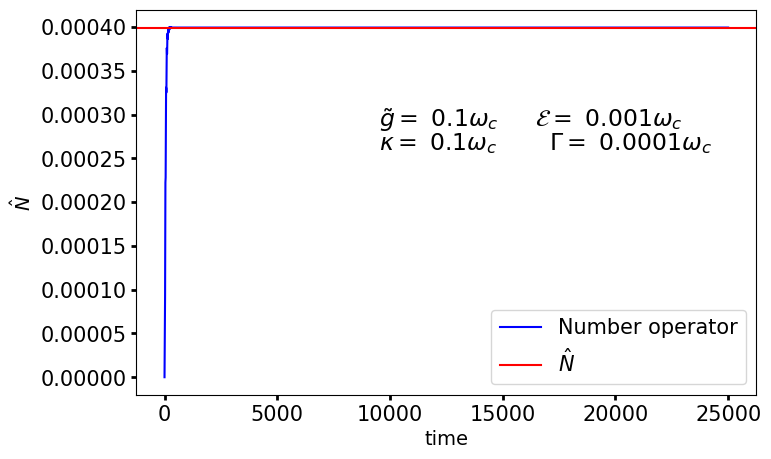

The calculated lower one-photon dressed state is 1.4756246098625196
Dressed state 0: energy = -3.5214481920201783
Dressed state 1: energy = -2.927809061525553
Dressed state 2: energy = -2.903745029778331
Dressed state 3: energy = -2.318258212313055
Dressed state 4: energy = -1.6837960821154931
Dressed state 5: energy = -1.2848206461934468
Dressed state 6: energy = -1.0012476441623994
Dressed state 7: energy = -0.9271836232704185
Dressed state 8: energy = -0.5854852602826895
Dressed state 9: energy = -0.2686982076074158
Dressed state 10: energy = -0.00072154273959461
Dressed state 11: energy = 0.0007275469578711726
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 6.103515625e-05
    preparation time: 0.000164031982421875
    run time: 6.41091775894165
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.24350580765063293

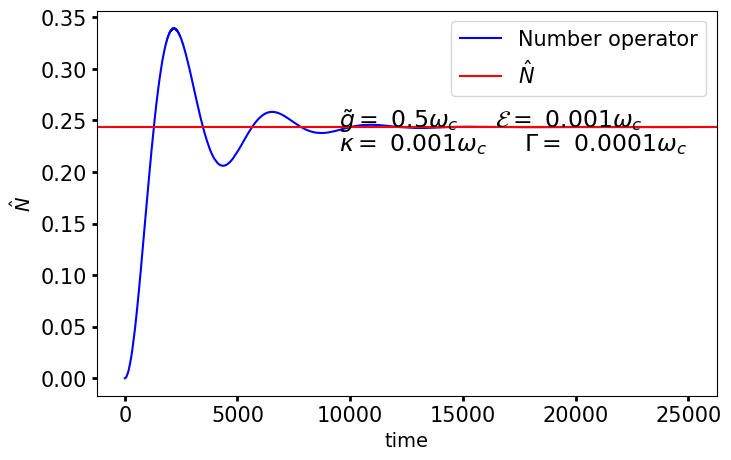

Dressed state 0: energy = -3.5214481920201783
Dressed state 1: energy = -2.927809061525553
Dressed state 2: energy = -2.903745029778331
Dressed state 3: energy = -2.318258212313055
Dressed state 4: energy = -1.6837960821154931
Dressed state 5: energy = -1.2848206461934468
Dressed state 6: energy = -1.0012476441623994
Dressed state 7: energy = -0.9271836232704185
Dressed state 8: energy = -0.5854852602826895
Dressed state 9: energy = -0.2686982076074158
Dressed state 10: energy = -0.00072154273959461
Dressed state 11: energy = 0.0007275469578711726
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.1975250244140625e-05
    preparation time: 8.702278137207031e-05
    run time: 3.1539061069488525
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.03417530177634304
The value of the correlation function g_2 for the final s

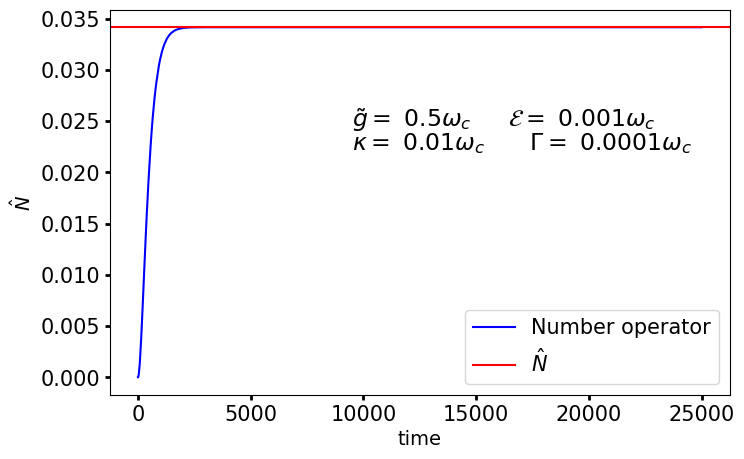

Dressed state 0: energy = -3.5214481920201783
Dressed state 1: energy = -2.927809061525553
Dressed state 2: energy = -2.903745029778331
Dressed state 3: energy = -2.318258212313055
Dressed state 4: energy = -1.6837960821154931
Dressed state 5: energy = -1.2848206461934468
Dressed state 6: energy = -1.0012476441623994
Dressed state 7: energy = -0.9271836232704185
Dressed state 8: energy = -0.5854852602826895
Dressed state 9: energy = -0.2686982076074158
Dressed state 10: energy = -0.00072154273959461
Dressed state 11: energy = 0.0007275469578711726
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.1021575927734375e-05
    preparation time: 0.00015091896057128906
    run time: 2.6757640838623047
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.0003987150283252573
The value of the correlation function g_2 for the fina

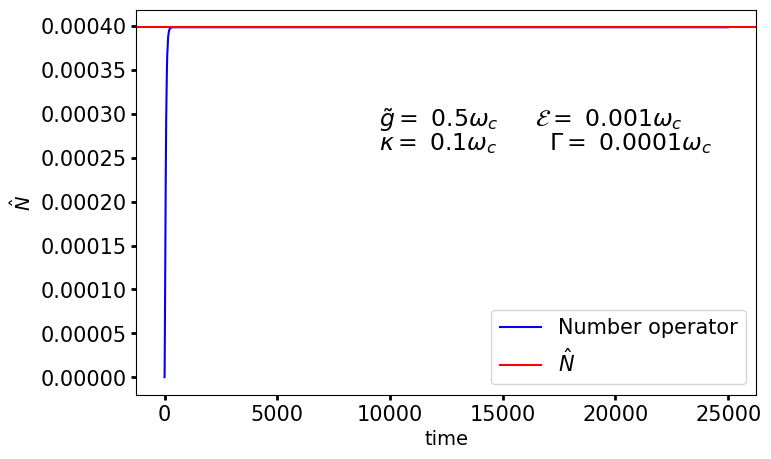

The calculated lower one-photon dressed state is 1.7753905296791062
Dressed state 0: energy = -5.690988926985718
Dressed state 1: energy = -4.726756294811028
Dressed state 2: energy = -4.702341565493575
Dressed state 3: energy = -3.7370366441295504
Dressed state 4: energy = -2.707427030543802
Dressed state 5: energy = -2.1129302856692167
Dressed state 6: energy = -1.6007800924183415
Dressed state 7: energy = -1.5263653673259376
Dressed state 8: energy = -0.9653039615296137
Dressed state 9: energy = -0.44413252962086386
Dressed state 10: energy = -0.0007162491088978543
Dressed state 11: energy = 0.000719879188716229
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 2.5272369384765625e-05
    preparation time: 6.699562072753906e-05
    run time: 9.025134801864624
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.2393561

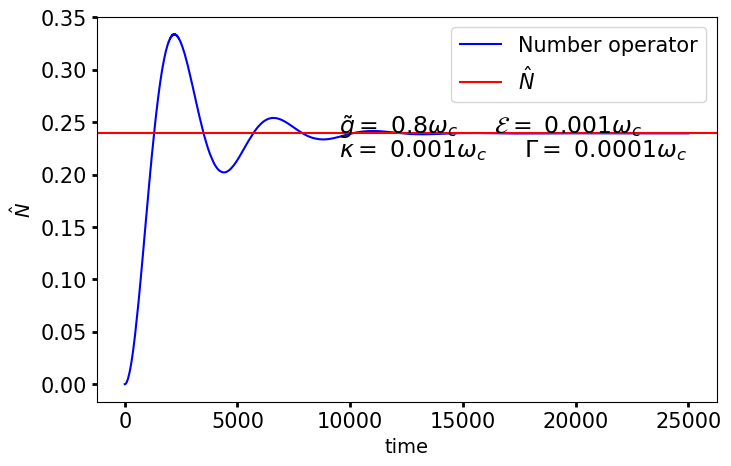

Dressed state 0: energy = -5.690988926985718
Dressed state 1: energy = -4.726756294811028
Dressed state 2: energy = -4.702341565493575
Dressed state 3: energy = -3.7370366441295504
Dressed state 4: energy = -2.707427030543802
Dressed state 5: energy = -2.1129302856692167
Dressed state 6: energy = -1.6007800924183415
Dressed state 7: energy = -1.5263653673259376
Dressed state 8: energy = -0.9653039615296137
Dressed state 9: energy = -0.44413252962086386
Dressed state 10: energy = -0.0007162491088978543
Dressed state 11: energy = 0.000719879188716229
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 2.3603439331054688e-05
    preparation time: 7.200241088867188e-05
    run time: 9.636380195617676
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.03407209957511838
The value of the correlation function g_2 for the final s

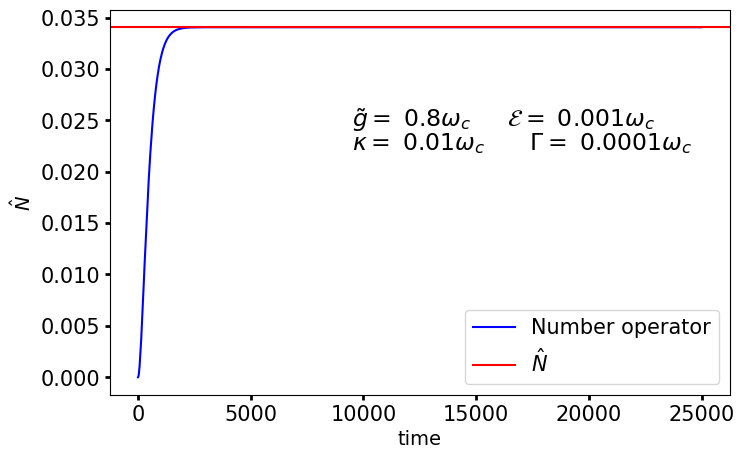

Dressed state 0: energy = -5.690988926985718
Dressed state 1: energy = -4.726756294811028
Dressed state 2: energy = -4.702341565493575
Dressed state 3: energy = -3.7370366441295504
Dressed state 4: energy = -2.707427030543802
Dressed state 5: energy = -2.1129302856692167
Dressed state 6: energy = -1.6007800924183415
Dressed state 7: energy = -1.5263653673259376
Dressed state 8: energy = -0.9653039615296137
Dressed state 9: energy = -0.44413252962086386
Dressed state 10: energy = -0.0007162491088978543
Dressed state 11: energy = 0.000719879188716229
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 8.082389831542969e-05
    preparation time: 0.0001690387725830078
    run time: 4.504821062088013
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.00039864940992318074
The value of the correlation function g_2 for the final

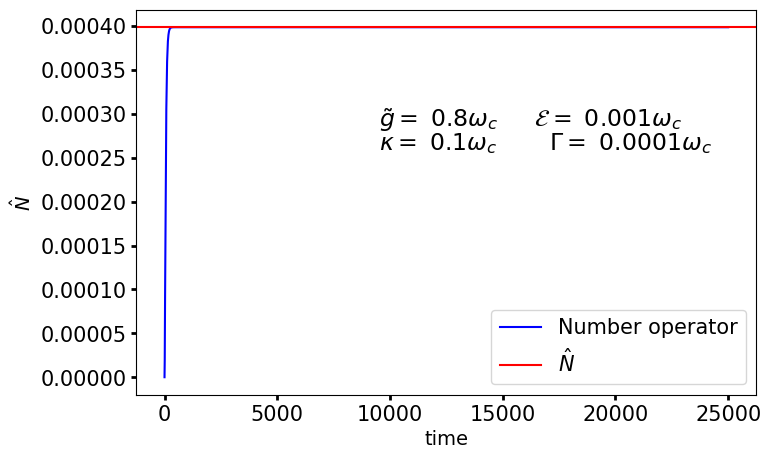

The calculated lower one-photon dressed state is 1.9753124511871278
Dressed state 0: energy = -7.1377757299040265
Dressed state 1: energy = -5.9264051540108715
Dressed state 2: energy = -5.901873425170019
Dressed state 3: energy = -4.683167698561396
Dressed state 4: energy = -3.3900585762467426
Dressed state 5: energy = -2.6653598368807545
Dressed state 6: energy = -2.0006241335500725
Dressed state 7: energy = -1.9260924074108678
Dressed state 8: energy = -1.2187049623165853
Dressed state 9: energy = -0.5611891910191456
Dressed state 10: energy = -0.0007144516180960476
Dressed state 11: energy = 0.0007173239519753677
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 4.887580871582031e-05
    preparation time: 9.489059448242188e-05
    run time: 8.822863101959229
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.237970

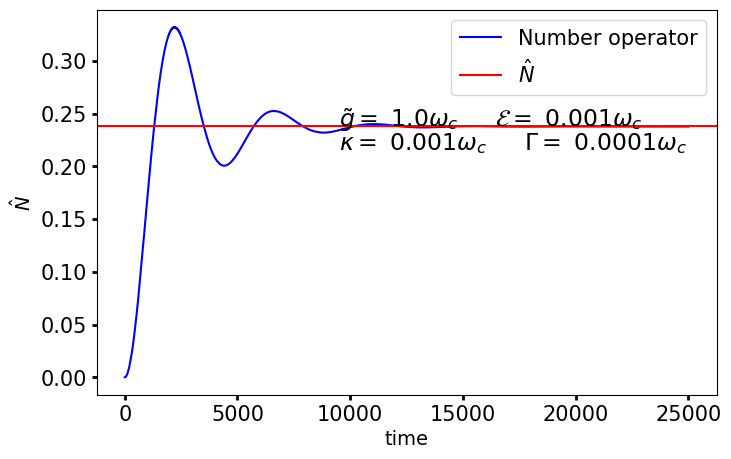

Dressed state 0: energy = -7.1377757299040265
Dressed state 1: energy = -5.9264051540108715
Dressed state 2: energy = -5.901873425170019
Dressed state 3: energy = -4.683167698561396
Dressed state 4: energy = -3.3900585762467426
Dressed state 5: energy = -2.6653598368807545
Dressed state 6: energy = -2.0006241335500725
Dressed state 7: energy = -1.9260924074108678
Dressed state 8: energy = -1.2187049623165853
Dressed state 9: energy = -0.5611891910191456
Dressed state 10: energy = -0.0007144516180960476
Dressed state 11: energy = 0.0007173239519753677
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 7.295608520507812e-05
    preparation time: 0.00016188621520996094
    run time: 7.627910137176514
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.03403725689415195
The value of the correlation function g_2 for the final

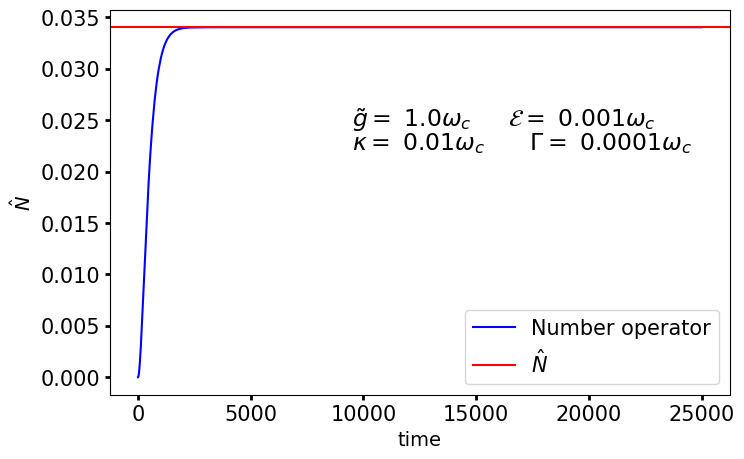

Dressed state 0: energy = -7.1377757299040265
Dressed state 1: energy = -5.9264051540108715
Dressed state 2: energy = -5.901873425170019
Dressed state 3: energy = -4.683167698561396
Dressed state 4: energy = -3.3900585762467426
Dressed state 5: energy = -2.6653598368807545
Dressed state 6: energy = -2.0006241335500725
Dressed state 7: energy = -1.9260924074108678
Dressed state 8: energy = -1.2187049623165853
Dressed state 9: energy = -0.5611891910191456
Dressed state 10: energy = -0.0007144516180960476
Dressed state 11: energy = 0.0007173239519753677
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.221366882324219e-05
    preparation time: 0.00015306472778320312
    run time: 5.69621467590332
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.0003986299782654238
The value of the correlation function g_2 for the fina

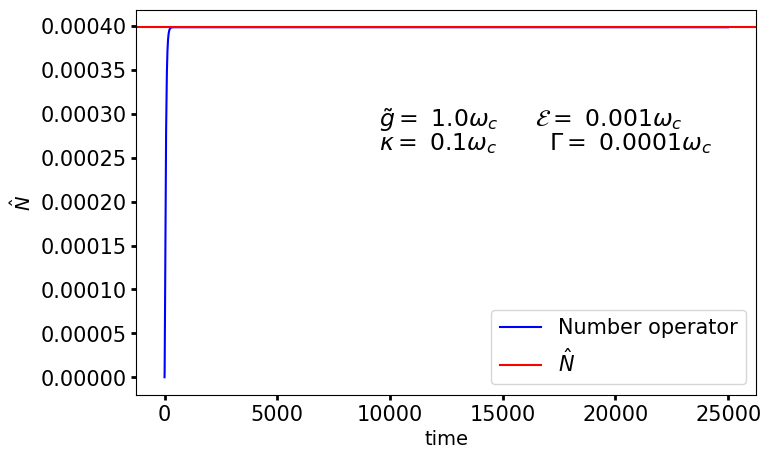

The calculated lower one-photon dressed state is 1.0780776406404415
Dressed state 0: energy = -0.6467305649288035
Dressed state 1: energy = -0.5383999755739702
Dressed state 2: energy = -0.5165466513721263
Dressed state 3: energy = -0.4331695633907672
Dressed state 4: energy = -0.3237473809156435
Dressed state 5: energy = -0.20521371772277106
Dressed state 6: energy = -0.19745463082450904
Dressed state 7: energy = -0.1348691372859165
Dressed state 8: energy = -0.08281608302748734
Dressed state 9: energy = -0.03625967609064641
Dressed state 10: energy = -0.005505638915771544
Dressed state 11: energy = 0.009917956992515232
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 4.9114227294921875e-05
    preparation time: 0.001474142074584961
    run time: 1.0822420120239258
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.4

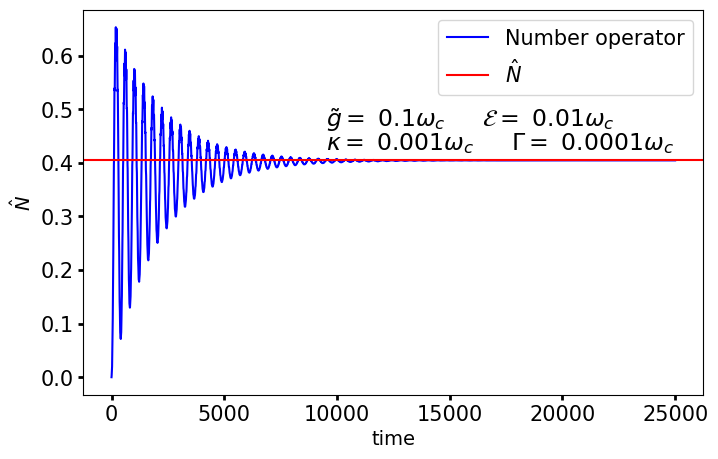

Dressed state 0: energy = -0.6467305649288035
Dressed state 1: energy = -0.5383999755739702
Dressed state 2: energy = -0.5165466513721263
Dressed state 3: energy = -0.4331695633907672
Dressed state 4: energy = -0.3237473809156435
Dressed state 5: energy = -0.20521371772277106
Dressed state 6: energy = -0.19745463082450904
Dressed state 7: energy = -0.1348691372859165
Dressed state 8: energy = -0.08281608302748734
Dressed state 9: energy = -0.03625967609064641
Dressed state 10: energy = -0.005505638915771544
Dressed state 11: energy = 0.009917956992515232
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 7.677078247070312e-05
    preparation time: 0.00017404556274414062
    run time: 1.2132019996643066
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.37874501446186554
The value of the correlation function g_2 for the 

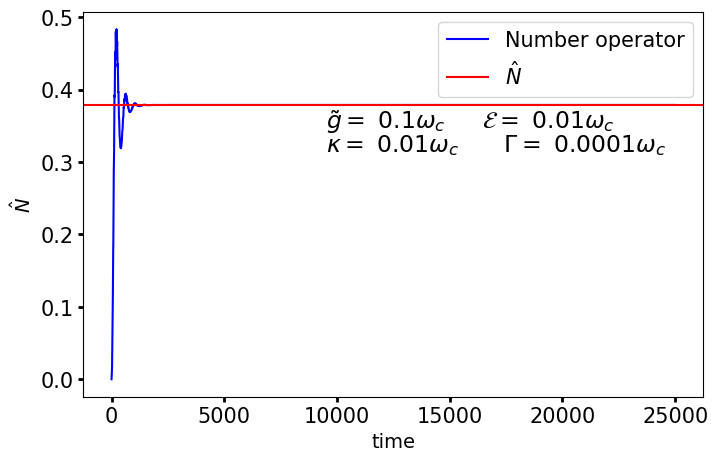

Dressed state 0: energy = -0.6467305649288035
Dressed state 1: energy = -0.5383999755739702
Dressed state 2: energy = -0.5165466513721263
Dressed state 3: energy = -0.4331695633907672
Dressed state 4: energy = -0.3237473809156435
Dressed state 5: energy = -0.20521371772277106
Dressed state 6: energy = -0.19745463082450904
Dressed state 7: energy = -0.1348691372859165
Dressed state 8: energy = -0.08281608302748734
Dressed state 9: energy = -0.03625967609064641
Dressed state 10: energy = -0.005505638915771544
Dressed state 11: energy = 0.009917956992515232
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 2.3126602172851562e-05
    preparation time: 7.295608520507812e-05
    run time: 1.1805291175842285
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.038978418272307906
The value of the correlation function g_2 for the

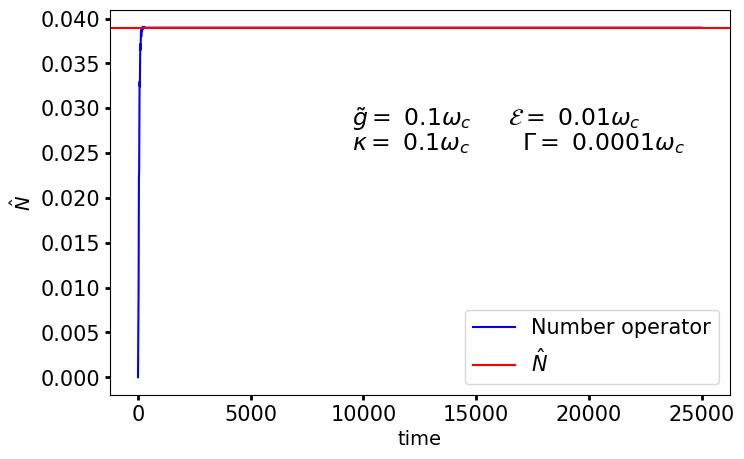

The calculated lower one-photon dressed state is 1.4756246098625196
Dressed state 0: energy = -3.5226027332010994
Dressed state 1: energy = -2.9276423288211086
Dressed state 2: energy = -2.903472207391366
Dressed state 3: energy = -2.318081019209244
Dressed state 4: energy = -1.6836255541262675
Dressed state 5: energy = -1.285913276678948
Dressed state 6: energy = -1.0010916675194659
Dressed state 7: energy = -0.9269516900993345
Dressed state 8: energy = -0.5852479707813959
Dressed state 9: energy = -0.2684580458467882
Dressed state 10: energy = -0.006942738824360734
Dressed state 11: energy = 0.0075432774486622065
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.1975250244140625e-05
    preparation time: 0.00013780593872070312
    run time: 5.004333972930908
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.264186

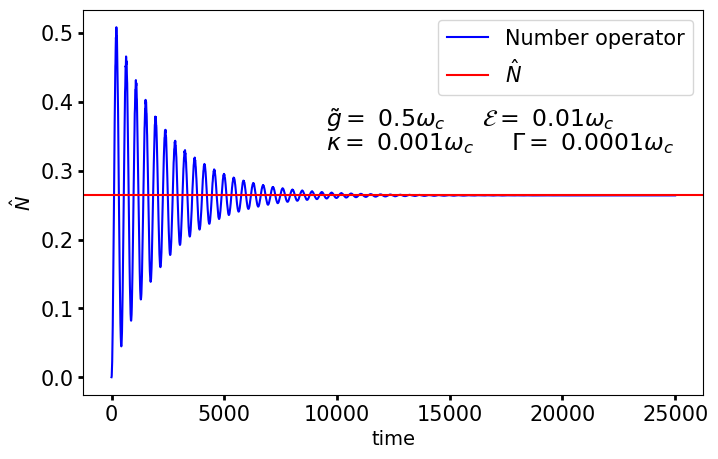

Dressed state 0: energy = -3.5226027332010994
Dressed state 1: energy = -2.9276423288211086
Dressed state 2: energy = -2.903472207391366
Dressed state 3: energy = -2.318081019209244
Dressed state 4: energy = -1.6836255541262675
Dressed state 5: energy = -1.285913276678948
Dressed state 6: energy = -1.0010916675194659
Dressed state 7: energy = -0.9269516900993345
Dressed state 8: energy = -0.5852479707813959
Dressed state 9: energy = -0.2684580458467882
Dressed state 10: energy = -0.006942738824360734
Dressed state 11: energy = 0.0075432774486622065
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 8.225440979003906e-05
    preparation time: 0.0001919269561767578
    run time: 3.7194182872772217
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.24795234009036898
The value of the correlation function g_2 for the final s

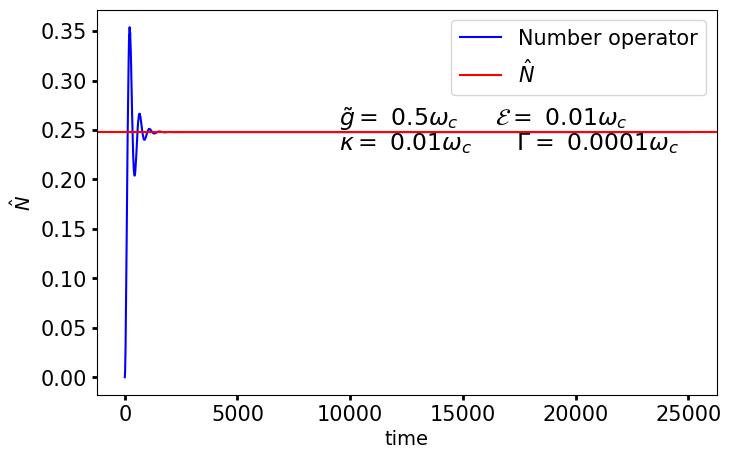

Dressed state 0: energy = -3.5226027332010994
Dressed state 1: energy = -2.9276423288211086
Dressed state 2: energy = -2.903472207391366
Dressed state 3: energy = -2.318081019209244
Dressed state 4: energy = -1.6836255541262675
Dressed state 5: energy = -1.285913276678948
Dressed state 6: energy = -1.0010916675194659
Dressed state 7: energy = -0.9269516900993345
Dressed state 8: energy = -0.5852479707813959
Dressed state 9: energy = -0.2684580458467882
Dressed state 10: energy = -0.006942738824360734
Dressed state 11: energy = 0.0075432774486622065
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.5789947509765625e-05
    preparation time: 0.00014781951904296875
    run time: 3.7739458084106445
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.03502364519587866
The value of the correlation function g_2 for the final

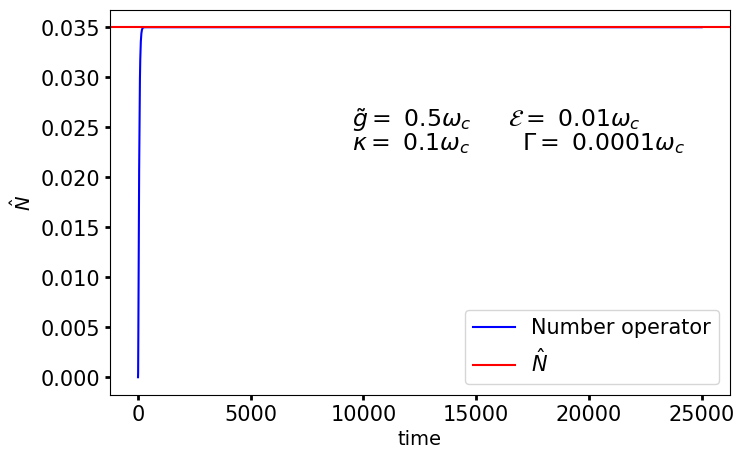

The calculated lower one-photon dressed state is 1.7753905296791062
Dressed state 0: energy = -5.691702515641464
Dressed state 1: energy = -4.7266502402706765
Dressed state 2: energy = -4.7021770850646565
Dressed state 3: energy = -3.736927738151662
Dressed state 4: energy = -2.7073222303527924
Dressed state 5: energy = -2.113593434032526
Dressed state 6: energy = -1.600684366440008
Dressed state 7: energy = -1.5262222339652582
Dressed state 8: energy = -0.9651581953827456
Dressed state 9: energy = -0.4439840623540853
Dressed state 10: energy = -0.006998260042776322
Dressed state 11: energy = 0.007361293250824434
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.00012493133544921875
    preparation time: 0.00017714500427246094
    run time: 8.366472959518433
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.25830652

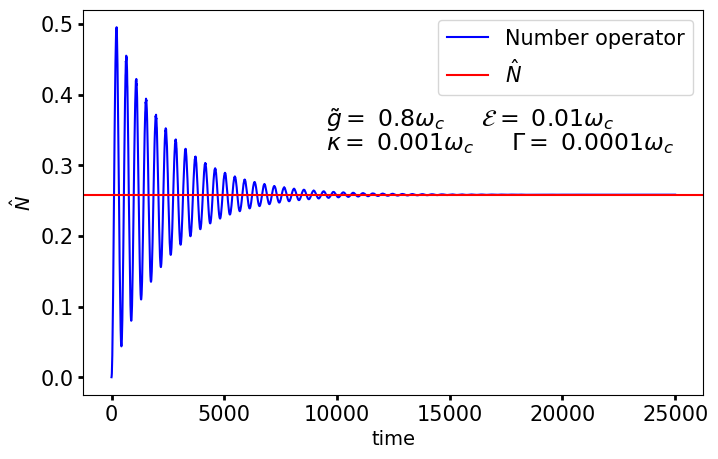

Dressed state 0: energy = -5.691702515641464
Dressed state 1: energy = -4.7266502402706765
Dressed state 2: energy = -4.7021770850646565
Dressed state 3: energy = -3.736927738151662
Dressed state 4: energy = -2.7073222303527924
Dressed state 5: energy = -2.113593434032526
Dressed state 6: energy = -1.600684366440008
Dressed state 7: energy = -1.5262222339652582
Dressed state 8: energy = -0.9651581953827456
Dressed state 9: energy = -0.4439840623540853
Dressed state 10: energy = -0.006998260042776322
Dressed state 11: energy = 0.007361293250824434
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 6.604194641113281e-05
    preparation time: 0.00018715858459472656
    run time: 7.446213006973267
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.24261927987063117
The value of the correlation function g_2 for the final sta

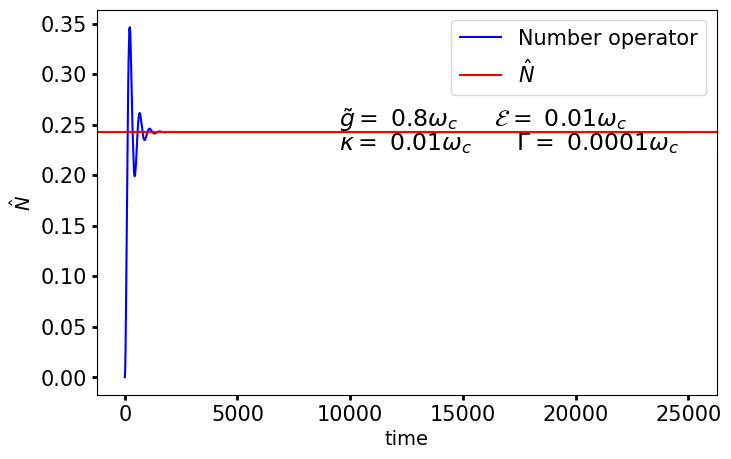

Dressed state 0: energy = -5.691702515641464
Dressed state 1: energy = -4.7266502402706765
Dressed state 2: energy = -4.7021770850646565
Dressed state 3: energy = -3.736927738151662
Dressed state 4: energy = -2.7073222303527924
Dressed state 5: energy = -2.113593434032526
Dressed state 6: energy = -1.600684366440008
Dressed state 7: energy = -1.5262222339652582
Dressed state 8: energy = -0.9651581953827456
Dressed state 9: energy = -0.4439840623540853
Dressed state 10: energy = -0.006998260042776322
Dressed state 11: energy = 0.007361293250824434
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 7.414817810058594e-05
    preparation time: 0.00016164779663085938
    run time: 5.952114820480347
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.03471326682800593
The value of the correlation function g_2 for the final sta

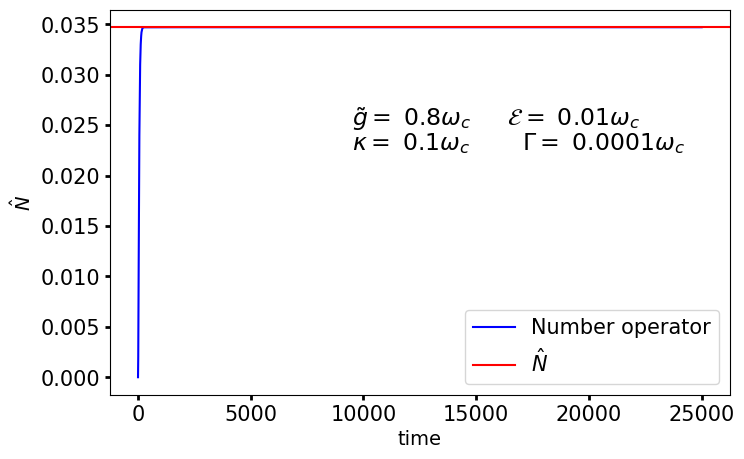

The calculated lower one-photon dressed state is 1.9753124511871278
Dressed state 0: energy = -7.138344424260601
Dressed state 1: energy = -5.926319887797279
Dressed state 2: energy = -5.901743429420646
Dressed state 3: energy = -4.6830810605418725
Dressed state 4: energy = -3.3899752075636047
Dressed state 5: energy = -2.6658851100411733
Dressed state 6: energy = -2.000548020517293
Dressed state 7: energy = -1.9259784645150744
Dressed state 8: energy = -1.2185890205409455
Dressed state 9: energy = -0.5610708633235059
Dressed state 10: energy = -0.007014719162028167
Dressed state 11: energy = 0.007301964947422388
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.1975250244140625e-05
    preparation time: 0.0001373291015625
    run time: 7.803696155548096
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.256487707192

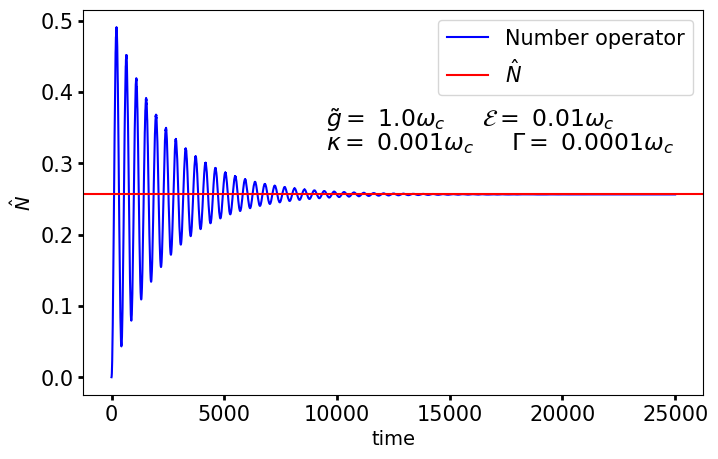

Dressed state 0: energy = -7.138344424260601
Dressed state 1: energy = -5.926319887797279
Dressed state 2: energy = -5.901743429420646
Dressed state 3: energy = -4.6830810605418725
Dressed state 4: energy = -3.3899752075636047
Dressed state 5: energy = -2.6658851100411733
Dressed state 6: energy = -2.000548020517293
Dressed state 7: energy = -1.9259784645150744
Dressed state 8: energy = -1.2185890205409455
Dressed state 9: energy = -0.5610708633235059
Dressed state 10: energy = -0.007014719162028167
Dressed state 11: energy = 0.007301964947422388
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.602836608886719e-05
    preparation time: 9.298324584960938e-05
    run time: 9.310073137283325
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.24098030922368952
The value of the correlation function g_2 for the final stat

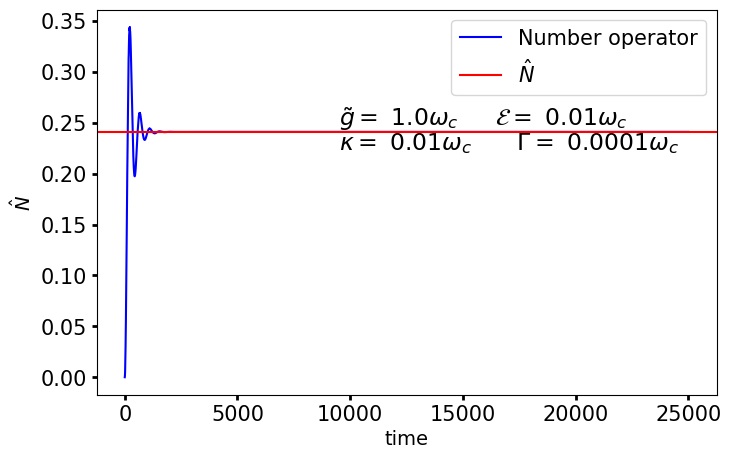

Dressed state 0: energy = -7.138344424260601
Dressed state 1: energy = -5.926319887797279
Dressed state 2: energy = -5.901743429420646
Dressed state 3: energy = -4.6830810605418725
Dressed state 4: energy = -3.3899752075636047
Dressed state 5: energy = -2.6658851100411733
Dressed state 6: energy = -2.000548020517293
Dressed state 7: energy = -1.9259784645150744
Dressed state 8: energy = -1.2185890205409455
Dressed state 9: energy = -0.5610708633235059
Dressed state 10: energy = -0.007014719162028167
Dressed state 11: energy = 0.007301964947422388
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.2928924560546875e-05
    preparation time: 0.00013113021850585938
    run time: 10.19370985031128
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.03463239400964744
The value of the correlation function g_2 for the final st

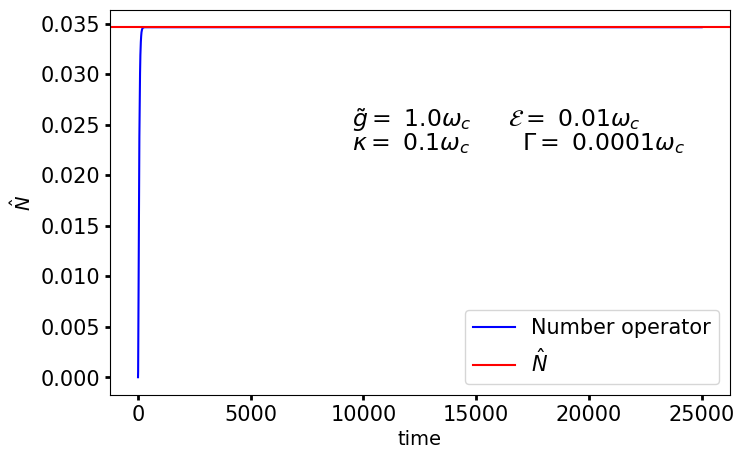

The calculated lower one-photon dressed state is 1.0780776406404415
Dressed state 0: energy = -0.8879810251400562
Dressed state 1: energy = -0.6597367783660014
Dressed state 2: energy = -0.5196177756549641
Dressed state 3: energy = -0.41797845418657475
Dressed state 4: energy = -0.3434116651800593
Dressed state 5: energy = -0.24471886880639943
Dressed state 6: energy = -0.2014913799776567
Dressed state 7: energy = -0.11708481805185422
Dressed state 8: energy = -0.07522035606248434
Dressed state 9: energy = 0.0178112286245235
Dressed state 10: energy = 0.11888881759660819
Dressed state 11: energy = 0.21974601214902087
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 6.461143493652344e-05
    preparation time: 0.0001499652862548828
    run time: 2.402914047241211
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  2.186838

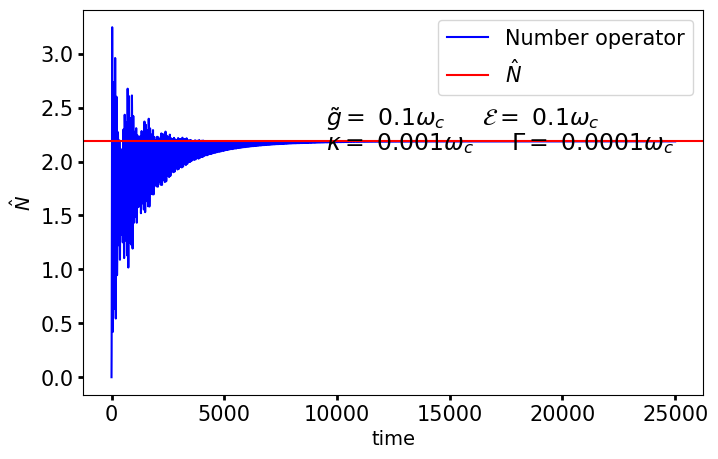

Dressed state 0: energy = -0.8879810251400562
Dressed state 1: energy = -0.6597367783660014
Dressed state 2: energy = -0.5196177756549641
Dressed state 3: energy = -0.41797845418657475
Dressed state 4: energy = -0.3434116651800593
Dressed state 5: energy = -0.24471886880639943
Dressed state 6: energy = -0.2014913799776567
Dressed state 7: energy = -0.11708481805185422
Dressed state 8: energy = -0.07522035606248434
Dressed state 9: energy = 0.0178112286245235
Dressed state 10: energy = 0.11888881759660819
Dressed state 11: energy = 0.21974601214902087
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 6.198883056640625e-05
    preparation time: 0.00014901161193847656
    run time: 1.861279010772705
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  2.1942507132021953
The value of the correlation function g_2 for the final 

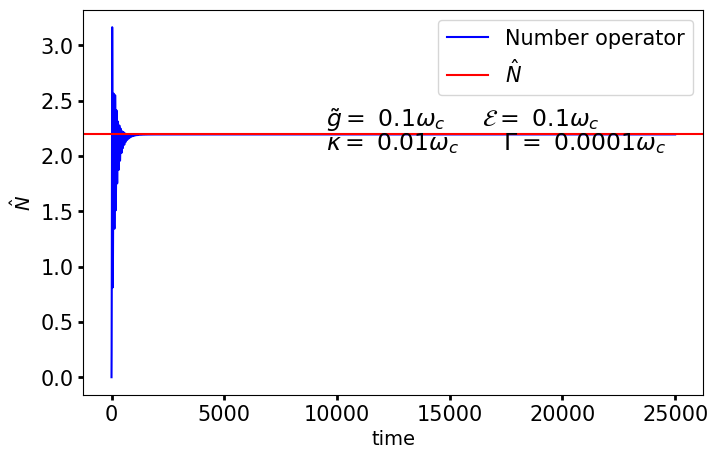

Dressed state 0: energy = -0.8879810251400562
Dressed state 1: energy = -0.6597367783660014
Dressed state 2: energy = -0.5196177756549641
Dressed state 3: energy = -0.41797845418657475
Dressed state 4: energy = -0.3434116651800593
Dressed state 5: energy = -0.24471886880639943
Dressed state 6: energy = -0.2014913799776567
Dressed state 7: energy = -0.11708481805185422
Dressed state 8: energy = -0.07522035606248434
Dressed state 9: energy = 0.0178112286245235
Dressed state 10: energy = 0.11888881759660819
Dressed state 11: energy = 0.21974601214902087
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 6.413459777832031e-05
    preparation time: 0.00014591217041015625
    run time: 1.9098119735717773
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  1.78116242497982
The value of the correlation function g_2 for the final s

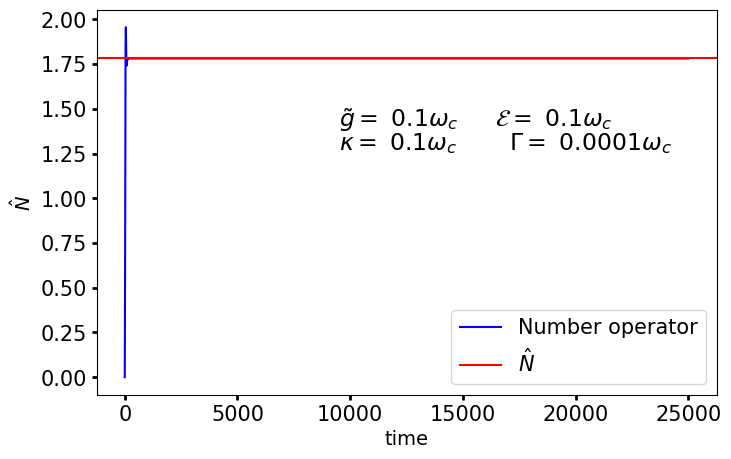

The calculated lower one-photon dressed state is 1.4756246098625196
Dressed state 0: energy = -3.6241986369761348
Dressed state 1: energy = -2.952395541092249
Dressed state 2: energy = -2.848857149717117
Dressed state 3: energy = -2.300332892707588
Dressed state 4: energy = -1.6665819787400293
Dressed state 5: energy = -1.3790593484349303
Dressed state 6: energy = -0.9855514193090126
Dressed state 7: energy = -0.9186742059053964
Dressed state 8: energy = -0.5622876662678808
Dressed state 9: energy = -0.24574227655131858
Dressed state 10: energy = -0.03931370487670051
Dressed state 11: energy = 0.10050886552763692
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.412101745605469e-05
    preparation time: 0.00013494491577148438
    run time: 6.010754108428955
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.434935372

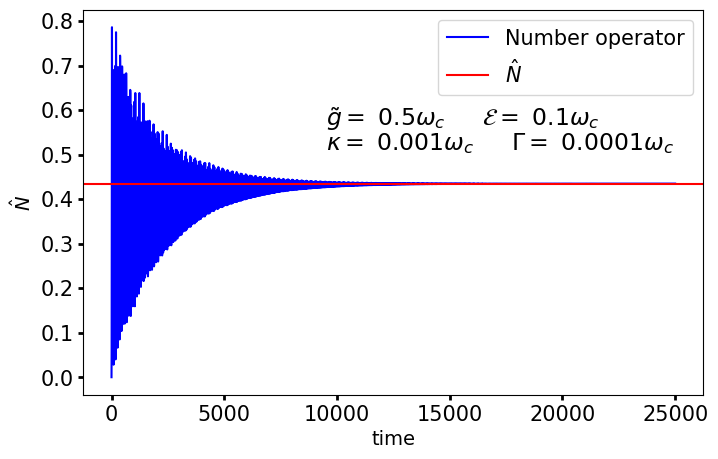

Dressed state 0: energy = -3.6241986369761348
Dressed state 1: energy = -2.952395541092249
Dressed state 2: energy = -2.848857149717117
Dressed state 3: energy = -2.300332892707588
Dressed state 4: energy = -1.6665819787400293
Dressed state 5: energy = -1.3790593484349303
Dressed state 6: energy = -0.9855514193090126
Dressed state 7: energy = -0.9186742059053964
Dressed state 8: energy = -0.5622876662678808
Dressed state 9: energy = -0.24574227655131858
Dressed state 10: energy = -0.03931370487670051
Dressed state 11: energy = 0.10050886552763692
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.00010609626770019531
    preparation time: 0.00021600723266601562
    run time: 4.588670015335083
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.4372409119891003
The value of the correlation function g_2 for the final sta

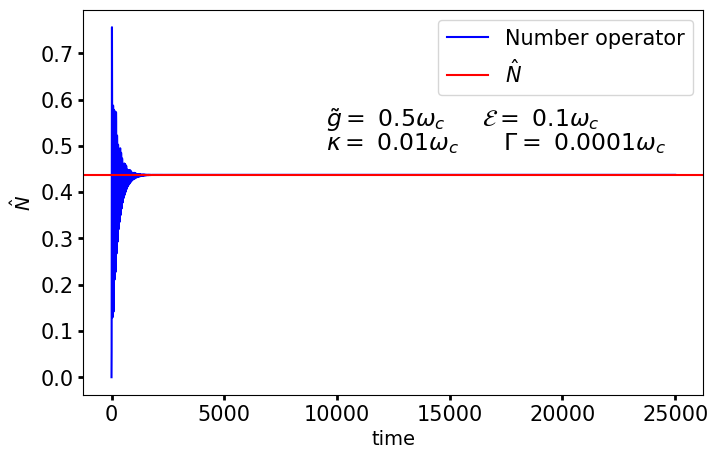

Dressed state 0: energy = -3.6241986369761348
Dressed state 1: energy = -2.952395541092249
Dressed state 2: energy = -2.848857149717117
Dressed state 3: energy = -2.300332892707588
Dressed state 4: energy = -1.6665819787400293
Dressed state 5: energy = -1.3790593484349303
Dressed state 6: energy = -0.9855514193090126
Dressed state 7: energy = -0.9186742059053964
Dressed state 8: energy = -0.5622876662678808
Dressed state 9: energy = -0.24574227655131858
Dressed state 10: energy = -0.03931370487670051
Dressed state 11: energy = 0.10050886552763692
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.316734313964844e-05
    preparation time: 0.0001342296600341797
    run time: 5.581117153167725
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.40864229746686725
The value of the correlation function g_2 for the final stat

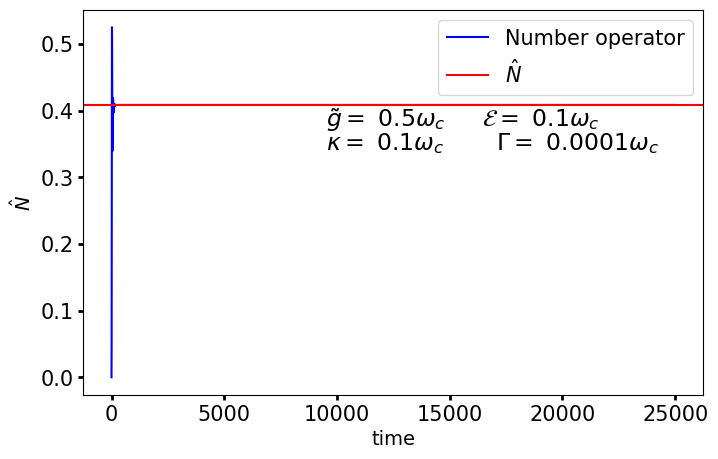

The calculated lower one-photon dressed state is 1.7753905296791062
Dressed state 0: energy = -5.759236556927366
Dressed state 1: energy = -4.739077363044555
Dressed state 2: energy = -4.666572573756532
Dressed state 3: energy = -3.72603481582574
Dressed state 4: energy = -2.696844490685817
Dressed state 5: energy = -2.1755289532269986
Dressed state 6: energy = -1.5911250378084747
Dressed state 7: energy = -1.5161308395543929
Dressed state 8: energy = -0.9506381467539635
Dressed state 9: energy = -0.4294247682462778
Dressed state 10: energy = -0.05264372013233311
Dressed state 11: energy = 0.08919819751461033
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.984306335449219e-05
    preparation time: 0.00015306472778320312
    run time: 7.074105978012085
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.3248918959869

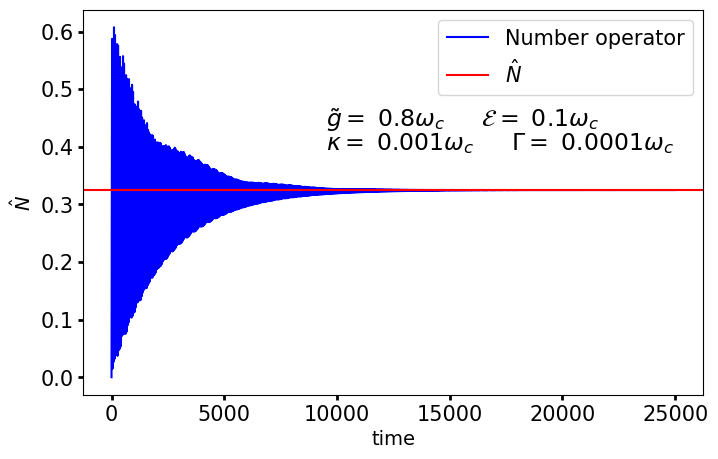

Dressed state 0: energy = -5.759236556927366
Dressed state 1: energy = -4.739077363044555
Dressed state 2: energy = -4.666572573756532
Dressed state 3: energy = -3.72603481582574
Dressed state 4: energy = -2.696844490685817
Dressed state 5: energy = -2.1755289532269986
Dressed state 6: energy = -1.5911250378084747
Dressed state 7: energy = -1.5161308395543929
Dressed state 8: energy = -0.9506381467539635
Dressed state 9: energy = -0.4294247682462778
Dressed state 10: energy = -0.05264372013233311
Dressed state 11: energy = 0.08919819751461033
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 7.510185241699219e-05
    preparation time: 0.00017213821411132812
    run time: 6.683192014694214
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.32626662085850827
The value of the correlation function g_2 for the final state i

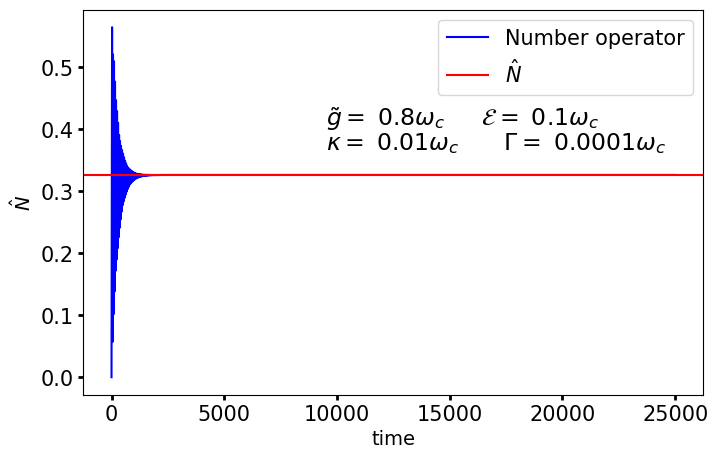

Dressed state 0: energy = -5.759236556927366
Dressed state 1: energy = -4.739077363044555
Dressed state 2: energy = -4.666572573756532
Dressed state 3: energy = -3.72603481582574
Dressed state 4: energy = -2.696844490685817
Dressed state 5: energy = -2.1755289532269986
Dressed state 6: energy = -1.5911250378084747
Dressed state 7: energy = -1.5161308395543929
Dressed state 8: energy = -0.9506381467539635
Dressed state 9: energy = -0.4294247682462778
Dressed state 10: energy = -0.05264372013233311
Dressed state 11: energy = 0.08919819751461033
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.459785461425781e-05
    preparation time: 0.0001461505889892578
    run time: 5.760592222213745
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.3078506386956925
The value of the correlation function g_2 for the final state is:

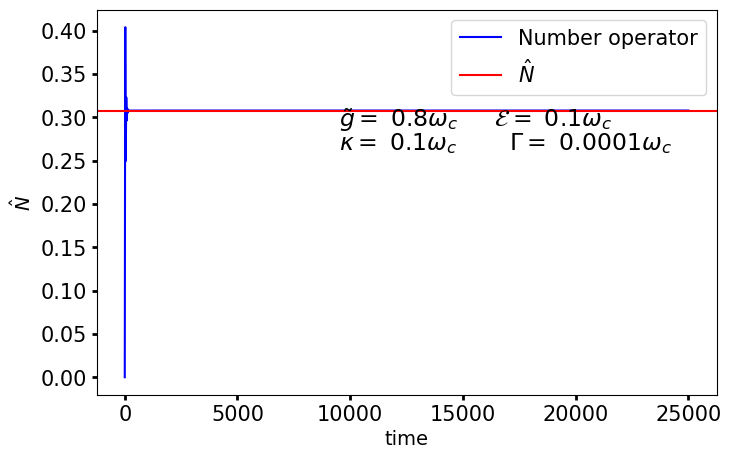

The calculated lower one-photon dressed state is 1.9753124511871278
Dressed state 0: energy = -7.193196934988688
Dressed state 1: energy = -5.9348042310036675
Dressed state 2: energy = -5.873775253192521
Dressed state 3: energy = -4.674416680593958
Dressed state 4: energy = -3.38163951355115
Dressed state 5: energy = -2.7161201322605915
Dressed state 6: energy = -1.9929434072470775
Dressed state 7: energy = -1.9168129122294555
Dressed state 8: energy = -1.2070071592260019
Dressed state 9: energy = -0.5493803064147214
Dressed state 10: energy = -0.05661868220464768
Dressed state 11: energy = 0.08546697017584859
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 6.413459777832031e-05
    preparation time: 0.00016570091247558594
    run time: 7.2859578132629395
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.29882148568

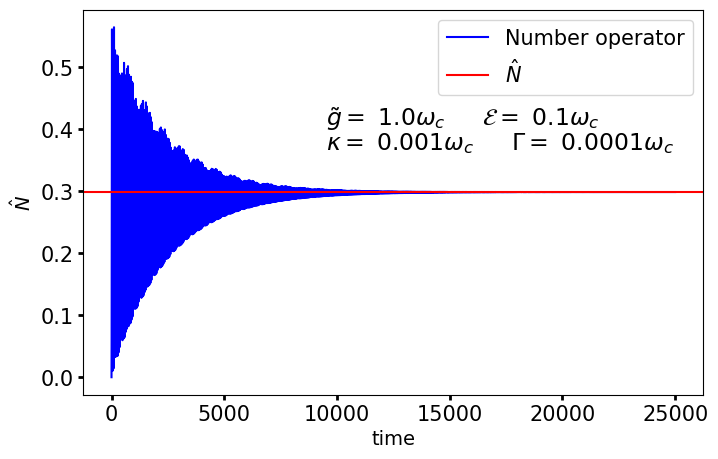

Dressed state 0: energy = -7.193196934988688
Dressed state 1: energy = -5.9348042310036675
Dressed state 2: energy = -5.873775253192521
Dressed state 3: energy = -4.674416680593958
Dressed state 4: energy = -3.38163951355115
Dressed state 5: energy = -2.7161201322605915
Dressed state 6: energy = -1.9929434072470775
Dressed state 7: energy = -1.9168129122294555
Dressed state 8: energy = -1.2070071592260019
Dressed state 9: energy = -0.5493803064147214
Dressed state 10: energy = -0.05661868220464768
Dressed state 11: energy = 0.08546697017584859
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 6.508827209472656e-05
    preparation time: 0.00016570091247558594
    run time: 8.421880006790161
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.2997408108774854
The value of the correlation function g_2 for the final state i

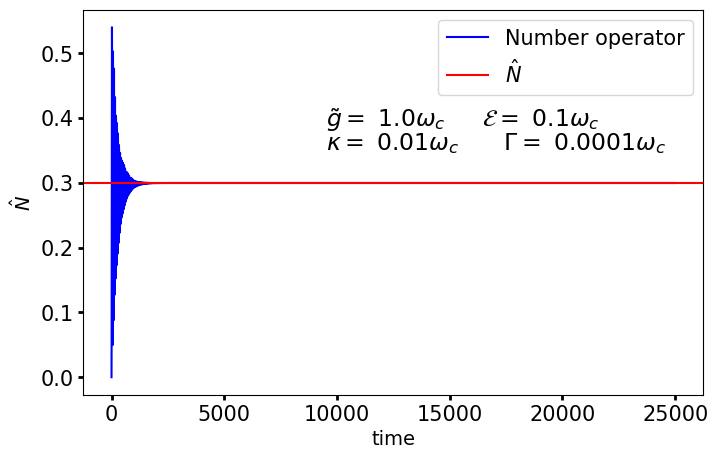

Dressed state 0: energy = -7.193196934988688
Dressed state 1: energy = -5.9348042310036675
Dressed state 2: energy = -5.873775253192521
Dressed state 3: energy = -4.674416680593958
Dressed state 4: energy = -3.38163951355115
Dressed state 5: energy = -2.7161201322605915
Dressed state 6: energy = -1.9929434072470775
Dressed state 7: energy = -1.9168129122294555
Dressed state 8: energy = -1.2070071592260019
Dressed state 9: energy = -0.5493803064147214
Dressed state 10: energy = -0.05661868220464768
Dressed state 11: energy = 0.08546697017584859
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.3882598876953125e-05
    preparation time: 0.00014901161193847656
    run time: 7.699987173080444
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  0.28288472474085413
The value of the correlation function g_2 for the final state

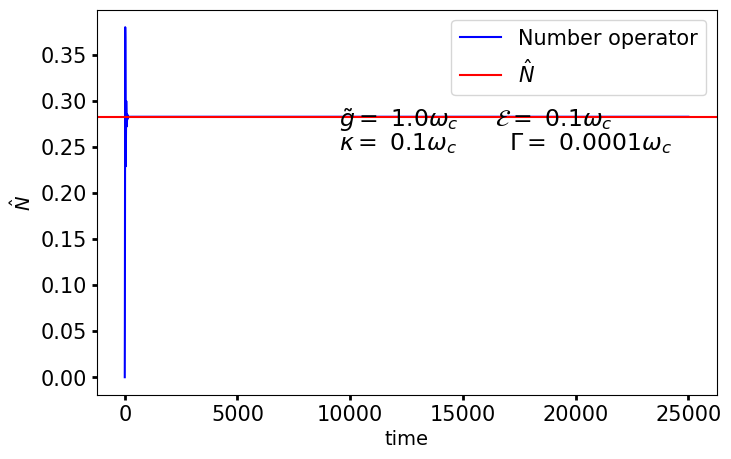

The calculated lower one-photon dressed state is 1.0780776406404415
Dressed state 0: energy = -3.8476670654215757
Dressed state 1: energy = -3.4934743571233793
Dressed state 2: energy = -2.2478554765649146
Dressed state 3: energy = -2.023637120863951
Dressed state 4: energy = -0.8867585533147317
Dressed state 5: energy = -0.7493983073992738
Dressed state 6: energy = 0.3509330928991772
Dressed state 7: energy = 0.48802570784665944
Dressed state 8: energy = 1.5426220129317076
Dressed state 9: energy = 1.7662881251462985
Dressed state 10: energy = 2.8181428529036423
Dressed state 11: energy = 3.1719840259044356
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 6.389617919921875e-05
    preparation time: 0.00016379356384277344
    run time: 12.125786781311035
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  2.5032737567963

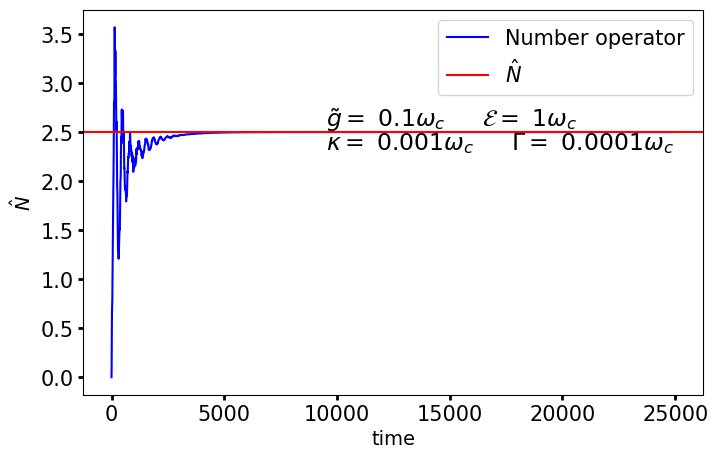

Dressed state 0: energy = -3.8476670654215757
Dressed state 1: energy = -3.4934743571233793
Dressed state 2: energy = -2.2478554765649146
Dressed state 3: energy = -2.023637120863951
Dressed state 4: energy = -0.8867585533147317
Dressed state 5: energy = -0.7493983073992738
Dressed state 6: energy = 0.3509330928991772
Dressed state 7: energy = 0.48802570784665944
Dressed state 8: energy = 1.5426220129317076
Dressed state 9: energy = 1.7662881251462985
Dressed state 10: energy = 2.8181428529036423
Dressed state 11: energy = 3.1719840259044356
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.125999450683594e-05
    preparation time: 0.000125885009765625
    run time: 11.30087399482727
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  2.5024141383082728
The value of the correlation function g_2 for the final state is: 1

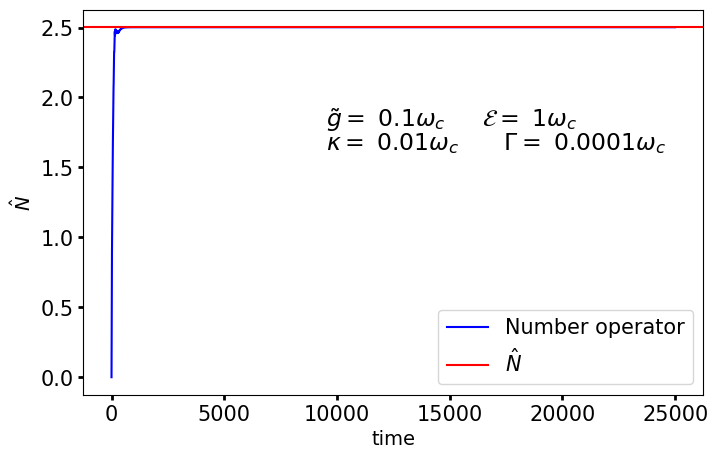

Dressed state 0: energy = -3.8476670654215757
Dressed state 1: energy = -3.4934743571233793
Dressed state 2: energy = -2.2478554765649146
Dressed state 3: energy = -2.023637120863951
Dressed state 4: energy = -0.8867585533147317
Dressed state 5: energy = -0.7493983073992738
Dressed state 6: energy = 0.3509330928991772
Dressed state 7: energy = 0.48802570784665944
Dressed state 8: energy = 1.5426220129317076
Dressed state 9: energy = 1.7662881251462985
Dressed state 10: energy = 2.8181428529036423
Dressed state 11: energy = 3.1719840259044356
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.00010085105895996094
    preparation time: 0.00016617774963378906
    run time: 12.192355155944824
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  2.503205465108998
The value of the correlation function g_2 for the final state is

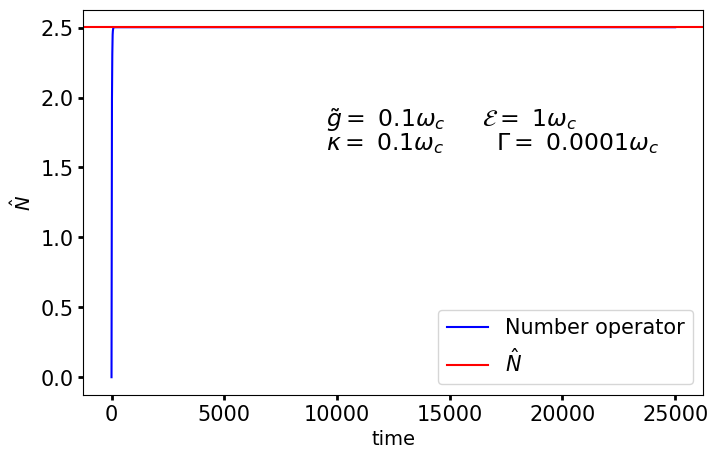

The calculated lower one-photon dressed state is 1.4756246098625196
Dressed state 0: energy = -6.289473834837061
Dressed state 1: energy = -4.780085026666033
Dressed state 2: energy = -3.7551259403260286
Dressed state 3: energy = -3.045760319865041
Dressed state 4: energy = -1.9311578583226017
Dressed state 5: energy = -1.6664839547278558
Dressed state 6: energy = -0.5182691784781275
Dressed state 7: energy = -0.4616031568969028
Dressed state 8: energy = 0.4788800334595005
Dressed state 9: energy = 0.6515115455097538
Dressed state 10: energy = 1.4329598798113976
Dressed state 11: energy = 2.4621218562882787
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.507469177246094e-05
    preparation time: 8.893013000488281e-05
    run time: 13.858638286590576
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  2.354332383198058

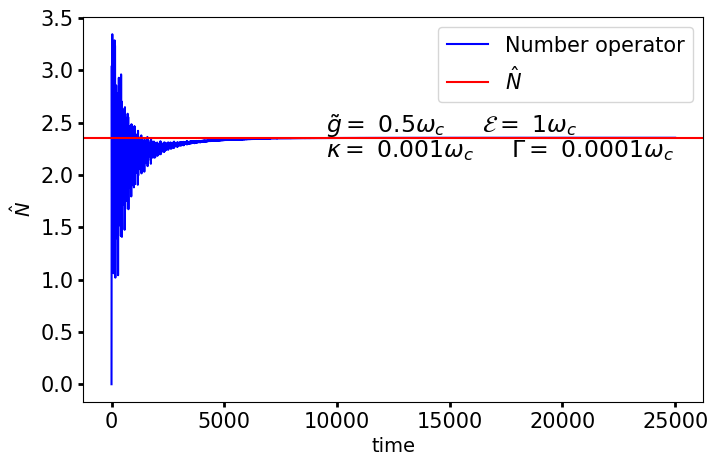

Dressed state 0: energy = -6.289473834837061
Dressed state 1: energy = -4.780085026666033
Dressed state 2: energy = -3.7551259403260286
Dressed state 3: energy = -3.045760319865041
Dressed state 4: energy = -1.9311578583226017
Dressed state 5: energy = -1.6664839547278558
Dressed state 6: energy = -0.5182691784781275
Dressed state 7: energy = -0.4616031568969028
Dressed state 8: energy = 0.4788800334595005
Dressed state 9: energy = 0.6515115455097538
Dressed state 10: energy = 1.4329598798113976
Dressed state 11: energy = 2.4621218562882787
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.793571472167969e-05
    preparation time: 0.00013899803161621094
    run time: 13.847508907318115
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  2.346394647220816
The value of the correlation function g_2 for the final state is: 

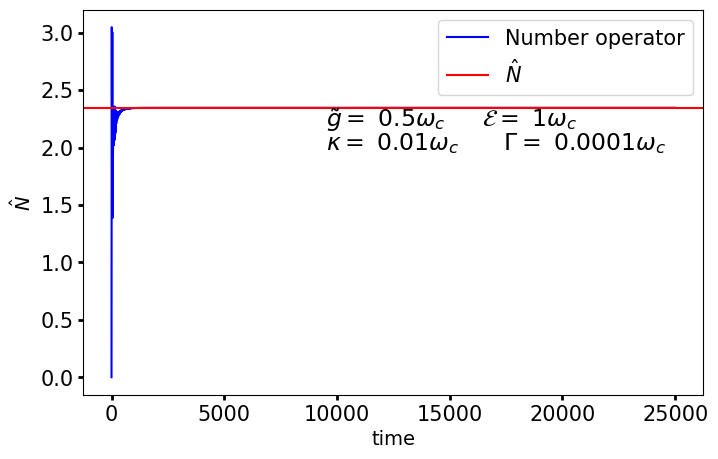

Dressed state 0: energy = -6.289473834837061
Dressed state 1: energy = -4.780085026666033
Dressed state 2: energy = -3.7551259403260286
Dressed state 3: energy = -3.045760319865041
Dressed state 4: energy = -1.9311578583226017
Dressed state 5: energy = -1.6664839547278558
Dressed state 6: energy = -0.5182691784781275
Dressed state 7: energy = -0.4616031568969028
Dressed state 8: energy = 0.4788800334595005
Dressed state 9: energy = 0.6515115455097538
Dressed state 10: energy = 1.4329598798113976
Dressed state 11: energy = 2.4621218562882787
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.793571472167969e-05
    preparation time: 0.0001289844512939453
    run time: 14.993321895599365
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  2.340739838572778
The value of the correlation function g_2 for the final state is: 1

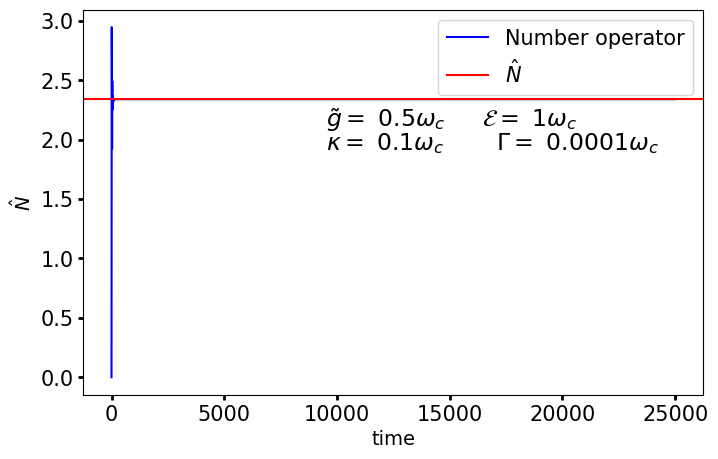

The calculated lower one-photon dressed state is 1.7753905296791062
Dressed state 0: energy = -8.205369653073472
Dressed state 1: energy = -6.148879841232697
Dressed state 2: energy = -4.884223182050153
Dressed state 3: energy = -4.008168843312308
Dressed state 4: energy = -3.0154634681470855
Dressed state 5: energy = -2.2818093893872873
Dressed state 6: energy = -1.6404214234375334
Dressed state 7: energy = -0.9179677723252468
Dressed state 8: energy = -0.46579384773633326
Dressed state 9: energy = 0.18781408279149336
Dressed state 10: energy = 1.0998659054038433
Dressed state 11: energy = 2.066358364058945
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.316734313964844e-05
    preparation time: 0.00017404556274414062
    run time: 17.205297231674194
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  2.1318257308041

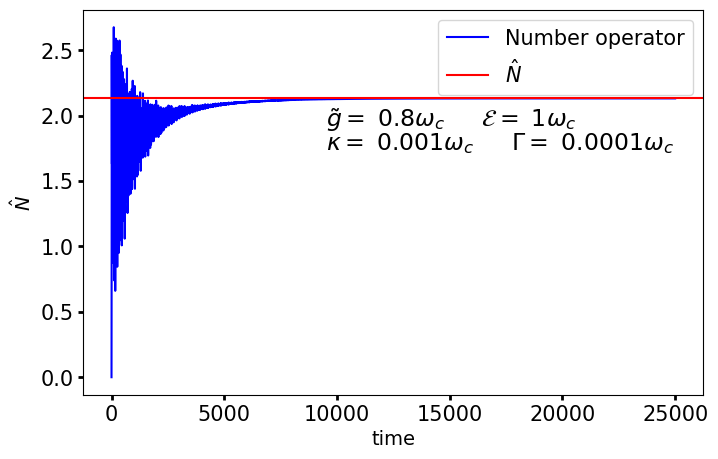

Dressed state 0: energy = -8.205369653073472
Dressed state 1: energy = -6.148879841232697
Dressed state 2: energy = -4.884223182050153
Dressed state 3: energy = -4.008168843312308
Dressed state 4: energy = -3.0154634681470855
Dressed state 5: energy = -2.2818093893872873
Dressed state 6: energy = -1.6404214234375334
Dressed state 7: energy = -0.9179677723252468
Dressed state 8: energy = -0.46579384773633326
Dressed state 9: energy = 0.18781408279149336
Dressed state 10: energy = 1.0998659054038433
Dressed state 11: energy = 2.066358364058945
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.602836608886719e-05
    preparation time: 0.0001552104949951172
    run time: 16.337548971176147
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  2.1420325114255823
The value of the correlation function g_2 for the final state is:

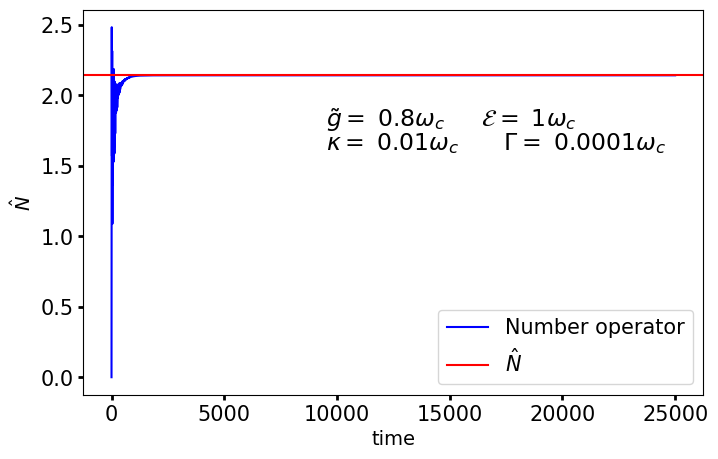

Dressed state 0: energy = -8.205369653073472
Dressed state 1: energy = -6.148879841232697
Dressed state 2: energy = -4.884223182050153
Dressed state 3: energy = -4.008168843312308
Dressed state 4: energy = -3.0154634681470855
Dressed state 5: energy = -2.2818093893872873
Dressed state 6: energy = -1.6404214234375334
Dressed state 7: energy = -0.9179677723252468
Dressed state 8: energy = -0.46579384773633326
Dressed state 9: energy = 0.18781408279149336
Dressed state 10: energy = 1.0998659054038433
Dressed state 11: energy = 2.066358364058945
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.00010228157043457031
    preparation time: 0.00025081634521484375
    run time: 15.090349197387695
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  2.1392903932368745
The value of the correlation function g_2 for the final state i

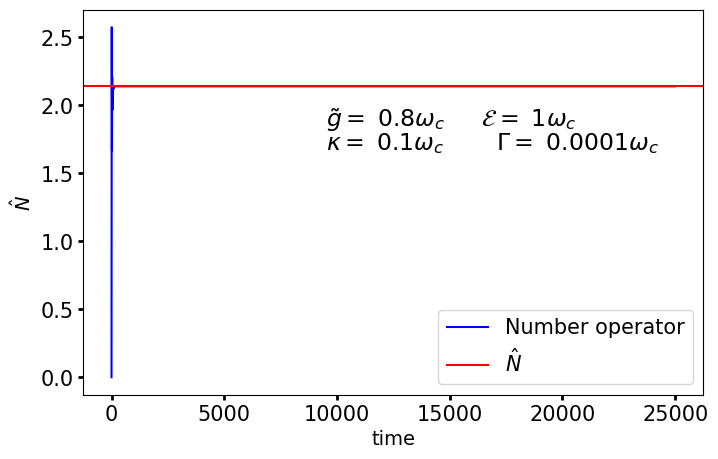

The calculated lower one-photon dressed state is 1.9753124511871278
Dressed state 0: energy = -9.506228235492706
Dressed state 1: energy = -7.1640666658342065
Dressed state 2: energy = -5.758764803454614
Dressed state 3: energy = -4.6182121819352435
Dressed state 4: energy = -3.8742254554564814
Dressed state 5: energy = -2.7297425980094676
Dressed state 6: energy = -2.3439960175131507
Dressed state 7: energy = -1.3106917752091376
Dressed state 8: energy = -0.8888007111285043
Dressed state 9: energy = 0.012636529007218122
Dressed state 10: energy = 0.9070749577007859
Dressed state 11: energy = 1.8637687145888742
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.1975250244140625e-05
    preparation time: 0.00013589859008789062
    run time: 16.42754364013672
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  1.8981916634

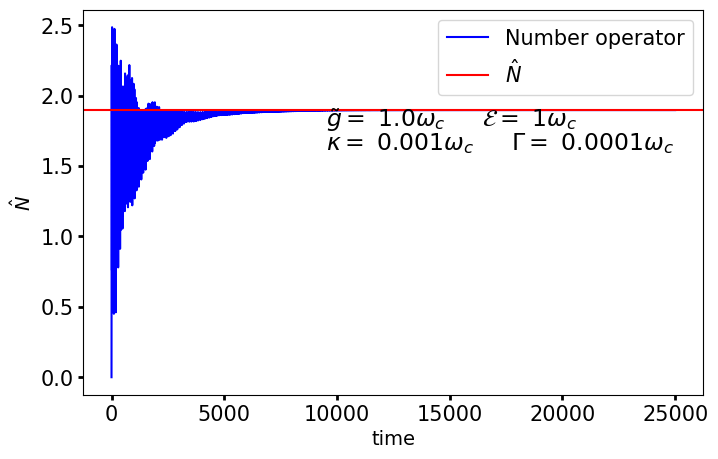

Dressed state 0: energy = -9.506228235492706
Dressed state 1: energy = -7.1640666658342065
Dressed state 2: energy = -5.758764803454614
Dressed state 3: energy = -4.6182121819352435
Dressed state 4: energy = -3.8742254554564814
Dressed state 5: energy = -2.7297425980094676
Dressed state 6: energy = -2.3439960175131507
Dressed state 7: energy = -1.3106917752091376
Dressed state 8: energy = -0.8888007111285043
Dressed state 9: energy = 0.012636529007218122
Dressed state 10: energy = 0.9070749577007859
Dressed state 11: energy = 1.8637687145888742
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 5.984306335449219e-05
    preparation time: 0.00013494491577148438
    run time: 18.379491806030273
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  1.9071792719943124
The value of the correlation function g_2 for the final state

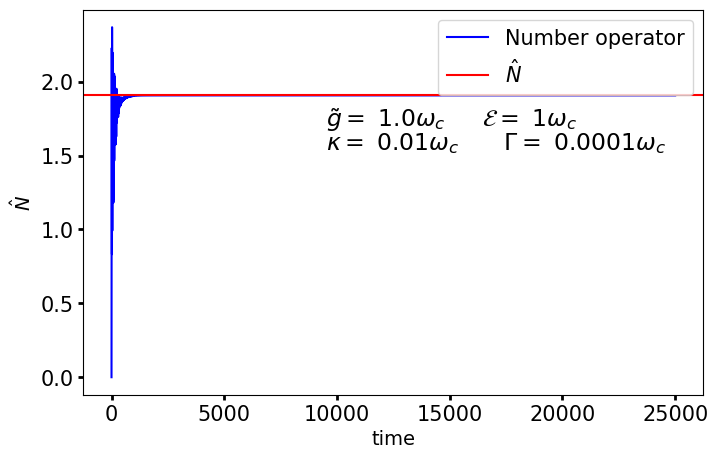

Dressed state 0: energy = -9.506228235492706
Dressed state 1: energy = -7.1640666658342065
Dressed state 2: energy = -5.758764803454614
Dressed state 3: energy = -4.6182121819352435
Dressed state 4: energy = -3.8742254554564814
Dressed state 5: energy = -2.7297425980094676
Dressed state 6: energy = -2.3439960175131507
Dressed state 7: energy = -1.3106917752091376
Dressed state 8: energy = -0.8888007111285043
Dressed state 9: energy = 0.012636529007218122
Dressed state 10: energy = 0.9070749577007859
Dressed state 11: energy = 1.8637687145888742
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.00010395050048828125
    preparation time: 0.0002048015594482422
    run time: 17.144760131835938
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 25000.0] (5000 steps)
  Number of e_ops: 2
  Final state saved.
>
The mean number of photons is  1.9039950524562137
The value of the correlation function g_2 for the final state

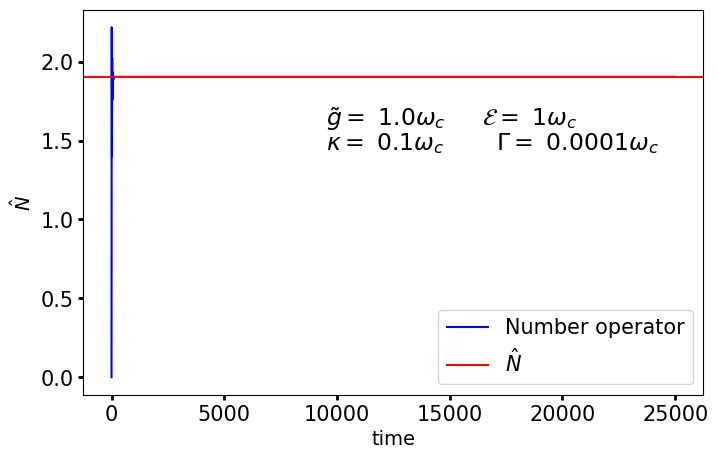

In [42]:
### %matplotlib inline
import matplotlib.pyplot as plt
import qutip
import numpy as np

plt.rcParams['text.usetex'] = False

L_dim = 6

t_Max = 25000.0
time = np.linspace(0.0,t_Max,5000)
psi0 = qutip.tensor(qutip.fock(2,0),qutip.fock(L_dim,0))
a = qutip.tensor(qutip.qeye(2), qutip.destroy(L_dim))
sigma = qutip.tensor(qutip.Qobj([[0,0],[1,0]]), qutip.qeye(L_dim))
ee = qutip.tensor(qutip.Qobj([[0,0],[0,1]]),qutip.qeye(L_dim))
gg = qutip.tensor(qutip.Qobj([[1,0],[0,0]]),qutip.qeye(L_dim))

omega_c = 1 
g_vec = [0.1,0.5,0.8,1.0]
omega_a = (1-0.05)
E_vec = [0.0001,0.001,0.01,0.1,1]
k_vec = [0.001,0.01,0.1]
G = 0.0001

for E in E_vec:
    for g in g_vec:
        delta = omega_a-omega_c
        omega = omega_c+delta/2+np.sqrt(delta**2/4+g**2)
        print(f"The calculated lower one-photon dressed state is {omega}")
        for k in k_vec:
            H = (omega_c-omega)*(a.dag()*a) + (omega_a-omega)*ee + g*(sigma*a+sigma.dag()*a.dag()) + E*a+E.conjugate()*a.dag()
            
            eigenvalues, eigenstates = H.eigenstates()
            for i, energy in enumerate(eigenvalues): 
                print(f"Dressed state {i}: energy = {energy}")
                #print(f"The correspondent eigenstate is {eigenstates[i]}")
            
            c0 = np.sqrt(k)*a
            c1 = np.sqrt(G)*sigma.dag()
            
            opts = qutip.solver.Options(store_final_state = True)
            result = qutip.mesolve(H,psi0,time,[c0,c1], e_ops=[a.dag()*a, ee], options=opts)
            print(result)
            f_state=result.final_state
            plt.figure(figsize=(8, 5))
            plt.plot(time,result.expect[0], color = "blue", label = "Number operator")
            #plt.plot(time,result.expect[1], color = "orange", label = "excited state")
            
            #Fit orizontal line for the tail
            mnp = qutip.expect(a.dag()*a,f_state)
            mnp = np.mean(result.expect[0][4500:])
            plt.axhline(y=mnp, color='r', linestyle='-', label = "$\hat N $")
            print("The mean number of photons is ", mnp)
            
            g2 = qutip.expect(a.dag()*a.dag()*a*a,f_state)/(qutip.expect(a.dag()*a,f_state)**2)
            print(f"The value of the correlation function g_2 for the final state is: {g2}")
            
            occupation_numbers = np.diag(f_state.full())
            
            for n in range(L_dim): 
                print(f"Occupation of {n}-photon state: {np.real_if_close(occupation_numbers[n])},\t with a probability of {round(100*abs(occupation_numbers[n]),2)}%")
            
            #Coherent state
            alpha = np.sqrt(mnp)
            coh_state = qutip.coherent(L_dim, alpha)
            coh_state = qutip.tensor(qutip.qeye(2),coh_state)
            #print(coh_state)
            overlap = (coh_state.dag() * f_state).full()[0,0]
            plt.tick_params(axis='both', which='both', labelsize=15, width=2)
            plt.xlabel("time", fontsize = 14)
            plt.ylabel("$\hat N$", fontsize = 14)
            legend = plt.legend(fontsize = 15)
            
            text_x = t_Max*0.38
            text_y = max(result.expect[0])*0.72
            
            s = '$g̃=$ '+str(g)+"$\omega_c$" + '\t$\mathcal{E}=$ '+str(E) +"$\omega_c$"
            
            plt.text(text_x, text_y, s, ha='left', fontsize = 17)
            
            text_y = max(result.expect[0])*0.65
            
            s = "$\kappa = $ "+str(k)+"$\omega_c$"+ "\t$\Gamma =$ "+str(G)+"$\omega_c$"
            
            plt.text(text_x, text_y, s, ha='left', fontsize = 17)
            plt.savefig(f"Images/N with E={E}, k={k}, g={g}_1.png")
            plt.show()

The calculated lower one-photon dressed state (LAB FRAME) is 1.7900624975587847
The calculated lower one-photon dressed state (RW FRAME) is -1.1102230246251565e-16
Dressed state 0: energy = -5.749201945833013
Dressed state 1: energy = -4.770280135004656
Dressed state 2: energy = -4.760373401991731
Dressed state 3: energy = -3.7658631409570633
Dressed state 4: energy = -2.7215389975360846
Dressed state 5: energy = -2.1714366562099783
Dressed state 6: energy = -1.600124045875126
Dressed state 7: energy = -1.5702173166518762
Dressed state 8: energy = -0.9945093156201222
Dressed state 9: energy = -0.4587084692666653
Dressed state 10: energy = -0.0007097549230946068
Dressed state 11: energy = 0.0007132677531529552
<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.00016617774963378906
    preparation time: 0.0002770423889160156
    run time: 1.2342431545257568
    solver: 'Master Equation Evolution'
    num_collapse: 2
  Time interval: [0.0, 6000.0] (

/var/folders/6w/vv6mxd6s5tn2fg5xf8lytbl40000gp/T/ipykernel_39973/129743620.py:49: RuntimeWarning: invalid value encountered in divide
  plt.plot(time,result.expect[2]/abs(result.expect[0])**2, color = "blue", label = "$g^{(2)}$")


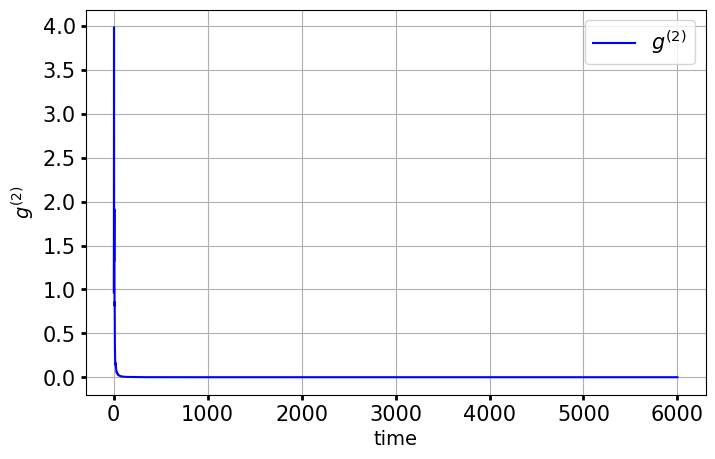

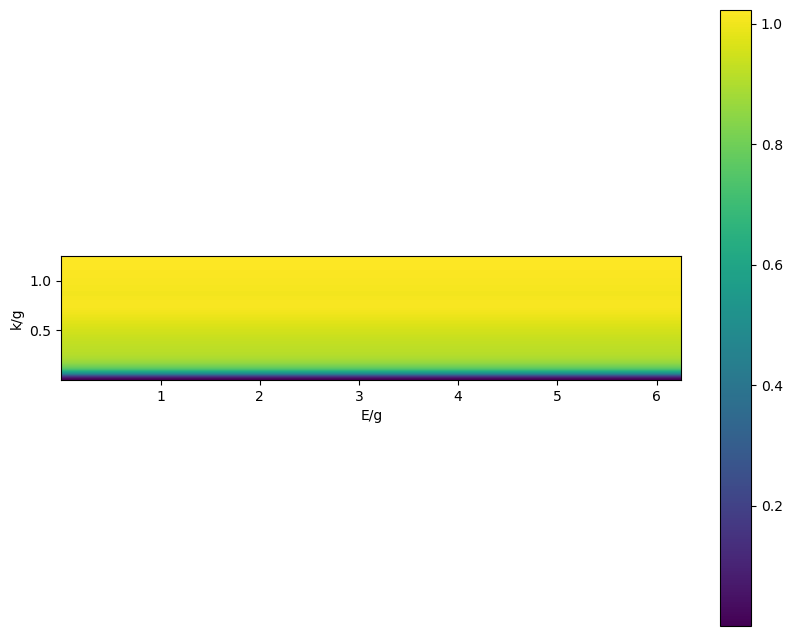

In [197]:
### %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import qutip
import numpy as np


plt.rcParams['text.usetex'] = False

L_dim = 6

t_Max = 6000.0
time = np.linspace(0.0,t_Max,5000)
psi0 = qutip.tensor(qutip.fock(2,0),qutip.fock(L_dim,0))
a = qutip.tensor(qutip.qeye(2), qutip.destroy(L_dim))
sigma = qutip.tensor(qutip.Qobj([[0,0],[1,0]]), qutip.qeye(L_dim))
ee = qutip.tensor(qutip.Qobj([[0,0],[0,1]]),qutip.qeye(L_dim))
gg = qutip.tensor(qutip.Qobj([[1,0],[0,0]]),qutip.qeye(L_dim))

omega_c = 1
omega_a = (1-0.02)
G = 0.0001
g = 0.8
E = 0.001
k = 0.01

delta = omega_a-omega_c
omega = omega_c+delta/2+np.sqrt(delta**2/4+g**2)
print(f"The calculated lower one-photon dressed state (LAB FRAME) is {omega}")
delta_c = omega_c-omega
first_state_1_photon = delta_c+delta/2+np.sqrt(delta**2/4+g**2)
print(f"The calculated lower one-photon dressed state (RW FRAME) is {first_state_1_photon}")
#omega = first_state_1_photon
H = (omega_c-omega)*(a.dag()*a) + (omega_a-omega)*ee + g*(sigma*a+sigma.dag()*a.dag()) + E*a+E.conjugate()*a.dag()

eigenvalues, eigenstates = H.eigenstates()
for i, energy in enumerate(eigenvalues): 
    print(f"Dressed state {i}: energy = {energy}")
    #print(f"The correspondent eigenstate is {eigenstates[i]}")

c0 = np.sqrt(k)*a
c1 = np.sqrt(G)*sigma.dag()

opts = qutip.solver.Options(store_final_state = True)
result = qutip.mesolve(H,psi0,time,[c0,c1], e_ops=[a.dag()*a, ee, a.dag()*a.dag()*a*a], options=opts)
print(result)
f_state=result.final_state
plt.figure(figsize=(8, 5))
plt.plot(time,result.expect[2]/abs(result.expect[0])**2, color = "blue", label = "$g^{(2)}$")
#plt.plot(time,result.expect[1], color = "orange", label = "excited state")

#Fit orizontal line for the tail
mnp = qutip.expect(a.dag()*a,f_state)
#mnp = np.mean(result.expect[0][4500:])
#plt.axhline(y=mnp, color='r', linestyle='-', label = "$\hat N $")
print("The mean number of photons is ", mnp)
f_state1 = qutip.steadystate(H, [c0,c1])
g2 = qutip.expect(a.dag()*a.dag()*a*a,f_state1)/abs(qutip.expect(a.dag()*a,f_state1))**2
print(f"The value of the correlation function g_2 for the final state is: {g2}")

occupation_numbers = np.diag(f_state.full())

for n in range(L_dim): 
    print(f"Occupation of {n}-photon state: {np.real_if_close(occupation_numbers[n])},\t with a probability of {round(100*abs(occupation_numbers[n]),2)}%")

#Coherent state
alpha = np.sqrt(mnp)
coh_state = qutip.coherent(L_dim, alpha)
coh_state = qutip.tensor(qutip.qeye(2),coh_state)
#print(coh_state)
overlap = (coh_state.dag() * f_state).full()[0,0]
plt.tick_params(axis='both', which='both', labelsize=15, width=2)
plt.xlabel("time", fontsize = 14)
plt.ylabel("$g^{(2)}$", fontsize = 14)
legend = plt.legend(fontsize = 15)

plt.grid()
plt.savefig(f"Images/N with E={E}, k={k}, g={g}_1.png")
plt.show()
plt.close()

# Grafico colormap variando E e k
if 0:
    E_range = np.linspace(2,0.00001,100)/g
    k_range = np.linspace(0.00001,5,100)/g
    g_2_a = []
    for E in E_range:
        g_2_a_r = []
        for k in k_range:
            H = (omega_c-omega)*(a.dag()*a) + (omega_a-omega)*ee + g*(sigma*a+sigma.dag()*a.dag()) + E*a+E.conjugate()*a.dag()
            f_state = qutip.steadystate(H, [c0,c1])
            g_2_a_r.append(qutip.expect(a.dag()*a.dag()*a*a,f_state)/qutip.expect(a.dag()*a,f_state)**2)    
        g_2_a.append(g_2_a_r)
    
    g_2_a = np.array(g_2_a)
    plt.figure(figsize=(10, 8))
    plt.imshow(g_2_a, extent = [0.00001,5/g,0.00001,1/g],cmap='viridis')
    plt.colorbar()
    plt.xlabel('E/g')
    plt.ylabel('k/g')
    
    plt.show()


E_range = np.linspace(2,0.00001,100)/g
g_2_a = []
for E in E_range:
    H = (omega_c-omega)*(a.dag()*a) + (omega_a-omega)*ee + g*(sigma*a+sigma.dag()*a.dag()) + E*a+E.conjugate()*a.dag()
    f_state = qutip.steadystate(H, [c0,c1])
        g_2_a_r.append(qutip.expect(a.dag()*a.dag()*a*a,f_state)/qutip.expect(a.dag()*a,f_state)**2)    
    g_2_a.append(g_2_a_r)

g_2_a = np.array(g_2_a)
plt.figure(figsize=(10, 8))
plt.imshow(g_2_a, extent = [0.00001,5/g,0.00001,1/g],cmap='viridis')
plt.colorbar()
plt.xlabel('E/g')
plt.ylabel('k/g')

plt.show()
